In [1]:
# import modules
import numpy as np
import pandas as pd
import itertools
import time
from collections import namedtuple
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from numpy.random import rand
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from adjustText import adjust_text
from umap import UMAP
# for wrapping texts
from textwrap import wrap


In [2]:
# plotting modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import matplotlib.cm as cm
#from matplotlib.colors import mcolors
from matplotlib.colorbar import ColorbarBase
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
from matplotlib import colorbar
from matplotlib import gridspec
import matplotlib.ticker as mticker
import matplotlib as mpl

In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
plt.rcParams['xtick.labelsize'] = 22 # or whatever size you want
plt.rcParams['ytick.labelsize'] = 22 # or whatever size you want

# Set global font size for labels, titles and legends
plt.rcParams['axes.labelsize'] = 22# or whatever size you want
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 22 # or whatever size you want
plt.rcParams['legend.fontsize'] = 22 # or whatever size you want
#plt.rcParams['axes.edgecolor'] = 'black'
#plt.rcParams['axes.linewidth'] = 1.5
# remove top and right spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

In [5]:
# files and folders paths
# core AP1s is just the 5 AP1s and no diff markers
#file_name = "20celllines_baseline_ap1_log10_coreAP1s.xlsx"
file_name = "20celllines_baseline_ap1_log10.xlsx"
folder_path = "/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/COPASI_Modeling/Basico_python/Copasi_basico_cluster/AP1 single cell data/"


In [6]:
# read data
#ap1 = pd.read_excel(folder_path + file_name)
ap1 = pd.read_excel(folder_path + file_name, usecols=["cell_line","condition","time",
                           "replicate_id","cFOS"  ,"cJUN (log a.u.)"  ,"FRA1 (log a.u.)"  ,"FRA2 (log a.u.)"  ,"JUND (log a.u.)"  ,"MITF (log a.u.)","SOX10 (log a.u.)"])

ap1


,cell_line,condition,time,replicate_id,cFOS,FRA1 (log a.u.),FRA2 (log a.u.),cJUN (log a.u.),JUND (log a.u.),MITF (log a.u.),SOX10 (log a.u.)
0,COLO858,DMSO,24 h,1,6.268912,7.131490,8.870446,4.935585,6.904436,7.647101,7.665642
1,COLO858,DMSO,24 h,1,6.256684,6.865455,8.498624,4.728451,6.900789,7.373826,7.636571
2,COLO858,DMSO,24 h,1,6.647364,7.151375,8.643793,4.903442,7.078269,7.820307,7.811804
3,COLO858,DMSO,24 h,1,6.197970,6.816909,8.554126,4.774648,6.722975,7.517822,7.596389
4,COLO858,DMSO,24 h,1,6.268976,6.809281,8.483059,4.889915,6.606444,7.172053,7.669223
...,...,...,...,...,...,...,...,...,...,...,...
117285,WM115,DMSO,24 h,2,5.879766,5.078526,5.511158,5.320457,6.110060,6.127083,6.660544
117286,WM115,DMSO,24 h,2,6.492230,5.016697,5.421357,5.560446,5.601450,6.570729,6.466751
117287,WM115,DMSO,24 h,2,5.750218,5.397314,4.885684,4.238472,5.913369,6.157936,7.082689
117288,WM115,DMSO,24 h,2,6.715969,4.393129,5.373734,5.519622,5.525268,6.246150,6.017869


In [7]:
# rename the columns MITF (log a.u.) to MITF and SOX10 (log a.u.) to SOX10
ap1.rename(columns={"cJUN (log a.u.)":"cJUN", "FRA1 (log a.u.)":"FRA1", "FRA2 (log a.u.)":"FRA2", "JUND (log a.u.)":"JUND", "MITF (log a.u.)":"MITF", "SOX10 (log a.u.)":"SOX10"}, inplace=True)
ap1



,cell_line,condition,time,replicate_id,cFOS,FRA1,FRA2,cJUN,JUND,MITF,SOX10
0,COLO858,DMSO,24 h,1,6.268912,7.131490,8.870446,4.935585,6.904436,7.647101,7.665642
1,COLO858,DMSO,24 h,1,6.256684,6.865455,8.498624,4.728451,6.900789,7.373826,7.636571
2,COLO858,DMSO,24 h,1,6.647364,7.151375,8.643793,4.903442,7.078269,7.820307,7.811804
3,COLO858,DMSO,24 h,1,6.197970,6.816909,8.554126,4.774648,6.722975,7.517822,7.596389
4,COLO858,DMSO,24 h,1,6.268976,6.809281,8.483059,4.889915,6.606444,7.172053,7.669223
...,...,...,...,...,...,...,...,...,...,...,...
117285,WM115,DMSO,24 h,2,5.879766,5.078526,5.511158,5.320457,6.110060,6.127083,6.660544
117286,WM115,DMSO,24 h,2,6.492230,5.016697,5.421357,5.560446,5.601450,6.570729,6.466751
117287,WM115,DMSO,24 h,2,5.750218,5.397314,4.885684,4.238472,5.913369,6.157936,7.082689
117288,WM115,DMSO,24 h,2,6.715969,4.393129,5.373734,5.519622,5.525268,6.246150,6.017869


In [8]:
# filter condition just for DMSO and remove HS695T
ap1 = ap1[ap1["condition"] == "DMSO"]
remove_cell = "HS695T"
ap1 = ap1[ap1["cell_line"] != remove_cell]

In [9]:
# this is includes all the AP1s grouped by cell line and replicate_id
# note adding MITF and SOX10 here for now
ap1_select = ap1[["cell_line","replicate_id","cFOS","cJUN","FRA1","FRA2","JUND","MITF","SOX10"]]
# ap1_select_grouped = ap1_select.groupby(["cell_line","replicate_id"])
# ap1_select_grouped.head()

In [11]:
# export ap1_select to a csv file
#ap1_select.to_csv(folder_path + "19celllines_baseline_ap1_log10_coreAP1s_MITF_SOX10.csv", index=False)


#### Plot all the 5 AP1s across all the cell lines using clustermap
- This is currently done in R


In [ ]:
# # Define the proteins of interest
# ap1_proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']
# diff_markers = ['MITF', 'SOX10']

# # Make a copy of the dataframe to avoid modifying the original
# data = ap1_select.copy()

# # Rename the problematic cell line with delta symbol (triangle)
# data['cell_line'] = data['cell_line'].str.replace('A375 _x001A_NRAS(Q61K)', 'A375ΔNRAS')

# # Extract relevant columns
# heatmap_data = data[['cell_line'] + ap1_proteins + diff_markers].copy()

# # Group by cell line and calculate the mean for each protein
# heatmap_matrix = heatmap_data.groupby('cell_line')[ap1_proteins + diff_markers].mean()

# # Z-score the data column-wise
# for col in heatmap_matrix.columns:
#     heatmap_matrix[col] = (heatmap_matrix[col] - heatmap_matrix[col].mean()) / heatmap_matrix[col].std()

# # Create separate matrices for AP-1 proteins and differentiation markers
# ap1_matrix = heatmap_matrix[ap1_proteins].copy()
# diff_matrix = heatmap_matrix[diff_markers].copy()

# # Transpose the matrices for clustering (proteins as rows, cell lines as columns)
# ap1_matrix_T = ap1_matrix.T
# diff_matrix_T = diff_matrix.T

# # For proteins (rows): Calculate Pearson correlation distance and perform average linkage clustering
# protein_dist = pdist(ap1_matrix_T, metric='correlation')  # 1 - Pearson correlation
# row_linkage = linkage(protein_dist, method='average')  # 'average' is UPGMA in R

# # For cell lines (columns): Calculate Pearson correlation distance and perform average linkage clustering
# cell_dist = pdist(ap1_matrix, metric='correlation')  # 1 - Pearson correlation
# col_linkage = linkage(cell_dist, method='average')  # 'average' is UPGMA in R

# # Define the color scheme
# colors = [
#     (0, 0, 0.8),      # Deep blue for strongly negative values (-3)
#     (0.4, 0.4, 0.9),  # Medium blue for moderately negative values
#     (0.75, 0.75, 1),  # Light blue for slightly negative values
#     (1, 1, 1),        # White exactly at zero
#     (1, 0.75, 0.75),  # Light red for slightly positive values
#     (0.9, 0.4, 0.4),  # Medium red for moderately positive values
#     (0.8, 0, 0)       # Deep red for strongly positive values (+3)
# ]

# # Create a custom colormap with non-linear distribution
# positions = [0, 0.3, 0.45, 0.5, 0.55, 0.7, 1.0]
# custom_cmap = LinearSegmentedColormap.from_list('compressed_red_blue', list(zip(positions, colors)))

# # STEP 1: Create clustermap for AP-1 proteins
# g = sns.clustermap(
#     ap1_matrix_T,
#     cmap=custom_cmap,
#     col_cluster=True,
#     row_cluster=True,
#     row_linkage=row_linkage,
#     col_linkage=col_linkage,
#     figsize=(12, 8),
#     linewidths=0.9,
#     linecolor='white',
#     cbar_kws={
#         'ticks': [-3, 0, +3],
#         'label': 'Protein level\n(z-score log a.u.)',
#         'orientation': 'horizontal',  # Put colorbar at the bottom
#     },
#     cbar_pos=(.3, 0.05, 0.4, 0.03),  # Position the colorbar at the bottom (x, y, width, height)
#     xticklabels=True,
#     yticklabels=True,
#     vmin=-3,
#     vmax=3,
#     square=True,
#     dendrogram_ratio=(0.15, 0.2)
# )

# # Rotate y-axis tick labels to horizontal
# g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)

# # Remove x-axis label
# g.ax_heatmap.set_xlabel('')

# # Add title
# plt.suptitle('AP-1 proteins', y=1.02, fontsize=24)
# plt.tight_layout()

# # Save the AP-1 clustermap figure
# plt.savefig('AP1_proteins_clustermap.pdf', dpi=300, bbox_inches='tight')
# plt.show()

# # Get the cell line order from the first clustermap
# cell_line_order = [x.get_text() for x in g.ax_heatmap.get_xticklabels()]

# # STEP 2: Create a second clustermap for differentiation markers using the same cell order
# # First, we need to reorder the differentiation markers data to match the cell line order
# ordered_dict = {}
# for cell in cell_line_order:
#     if cell in diff_matrix.index:
#         ordered_dict[cell] = diff_matrix.loc[cell]

# # Create a new ordered dataframe
# diff_matrix_ordered = pd.DataFrame(ordered_dict).T

# # Create a clustermap for differentiation markers that matches the style of the first one
# g2 = sns.clustermap(
#     diff_matrix_ordered.T,  # Transpose to have markers as rows and cell lines as columns
#     cmap=custom_cmap,
#     col_cluster=False,  # Don't cluster columns - use the same order from AP-1 clustering
#     row_cluster=False,  # Don't cluster rows either - just use the order MITF, SOX10
#     figsize=(12, 4),  # Keep width the same, adjust height for fewer rows
#     linewidths=0.9,
#     linecolor='white',
#     cbar_kws={
#         'ticks': [-3, 0, +3],
#         'label': 'Protein level\n(z-score log a.u.)',
#         'orientation': 'horizontal',  # Put colorbar at the bottom
#     },
#     cbar_pos=(.3, 0.05, 0.4, 0.05),  # Position the colorbar at the bottom
#     xticklabels=True,
#     yticklabels=True,
#     vmin=-3,
#     vmax=3,
#     square=True
# )

# # Rotate y-axis tick labels to horizontal
# g2.ax_heatmap.set_yticklabels(g2.ax_heatmap.get_yticklabels(), rotation=0)

# # Remove x-axis label
# g2.ax_heatmap.set_xlabel('')

# # Remove row dendrogram
# g2.ax_row_dendrogram.set_visible(False)

# # Remove column dendrogram
# g2.ax_col_dendrogram.set_visible(False)

# # Add title
# plt.suptitle('Differentiation state markers', y=1.02, fontsize=24)
# plt.tight_layout()

# # Save the differentiation markers clustermap
# #plt.savefig('Differentiation_markers_heatmap.pdf', dpi=300, bbox_inches='tight')
# plt.show()



#### UMAP based on the 5 chosen AP-1 factors

In [10]:
cell_order = ['SKMEL5','RVH421','WM2664','COLO858','SKMEL19',
              'C32','WM115','SKMEL28','UACC62','A375ΔNRAS',
              'WM902B','A375','A101D','A2058','MMACSF','IGR39','LOXIMVI',
              'HS294T','WM1552C']
# sample 500 cell lines from each cell line
ap1_select['cell_line'] = ap1_select['cell_line'].str.replace('A375 _x001A_NRAS(Q61K)', 'A375ΔNRAS')
# looking at each rep and cell line we can sample about 700 total based on the smallest count
ap1_select_500 = ap1_select.groupby('cell_line').sample(n=500, random_state=42)
ap1_select_500

/var/folders/8m/w_9fk48x5cb6tvnvzfhr9dnn2lj95t/T/ipykernel_48373/3581319701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1_select['cell_line'] = ap1_select['cell_line'].str.replace('A375 _x001A_NRAS(Q61K)', 'A375ΔNRAS')


,cell_line,replicate_id,cFOS,cJUN,FRA1,FRA2,JUND,MITF,SOX10
61558,A101D,1,5.702868,5.825610,6.432976,5.816780,6.659655,6.479299,7.361410
61791,A101D,1,6.372858,6.430542,6.370205,6.060315,6.235429,6.854564,7.092772
61961,A101D,1,6.028881,6.523997,6.271028,7.031628,6.550968,6.542143,7.265752
64295,A101D,2,5.759676,5.034977,6.425624,5.996918,6.401267,6.562742,7.455991
62147,A101D,1,6.280396,5.582912,6.310680,6.114294,6.787506,6.960813,7.572951
...,...,...,...,...,...,...,...,...,...
9315,WM902B,2,7.033686,5.283204,6.271005,6.383030,6.907357,7.393279,7.495081
11447,WM902B,2,7.008603,5.872332,5.698233,6.016442,6.387214,7.088851,7.016303
7069,WM902B,1,7.104088,5.344388,6.555416,6.363395,6.821607,7.231771,7.491804
11628,WM902B,2,6.708171,4.936171,6.501429,6.123359,6.965211,7.420084,7.617390


#### If you want to plot distributions for a given cellline and AP1 across two replicates gated by the chosen threshold

In [ ]:
# # remove SOX10 and MITF
# ap1_select = ap1_select.drop(['SOX10','MITF'], axis = 1, inplace = False)
# ap1_select

,cell_line,replicate_id,cFOS,cJUN,FRA1,FRA2,JUND
0,COLO858,1,6.268912,4.935585,7.131490,8.870446,6.904436
1,COLO858,1,6.256684,4.728451,6.865455,8.498624,6.900789
2,COLO858,1,6.647364,4.903442,7.151375,8.643793,7.078269
3,COLO858,1,6.197970,4.774648,6.816909,8.554126,6.722975
4,COLO858,1,6.268976,4.889915,6.809281,8.483059,6.606444
...,...,...,...,...,...,...,...
117285,WM115,2,5.879766,5.320457,5.078526,5.511158,6.110060
117286,WM115,2,6.492230,5.560446,5.016697,5.421357,5.601450
117287,WM115,2,5.750218,4.238472,5.397314,4.885684,5.913369
117288,WM115,2,6.715969,5.519622,4.393129,5.373734,5.525268


In [11]:
# assign threshold for each cell and replicate
thresholds = {'cFOS': {'high': 6.37},
              'cJUN': {'high': 6.25},
              'FRA1': {'high': 6.25},
              'FRA2': {'high': 6.8},
              'JUND': {'high': 5.75}
              }
# Define a function to categorize protein levels


def categorize_protein_levels(value, thresholds):
    if value >= thresholds['high']:
        return 'high'
    else:
        return 'low'


# Apply this function to your data (only to the protein columns)
for protein, protein_thresholds in thresholds.items():
    ap1_select[protein + '_state'] = ap1_select[protein].apply(
        categorize_protein_levels, thresholds=protein_thresholds)
# Generate all possible states
states = list(itertools.product(
    ['low', 'medium', 'high'], repeat=len(thresholds)))
# Create a new column representing the state of each cell make sure to maintain order
ap1_select['state'] = list(zip(ap1_select['cFOS_state'], ap1_select['cJUN_state'],
                                ap1_select['FRA1_state'], ap1_select['FRA2_state'], ap1_select['JUND_state']))


/var/folders/8m/w_9fk48x5cb6tvnvzfhr9dnn2lj95t/T/ipykernel_48373/1339612821.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1_select[protein + '_state'] = ap1_select[protein].apply(


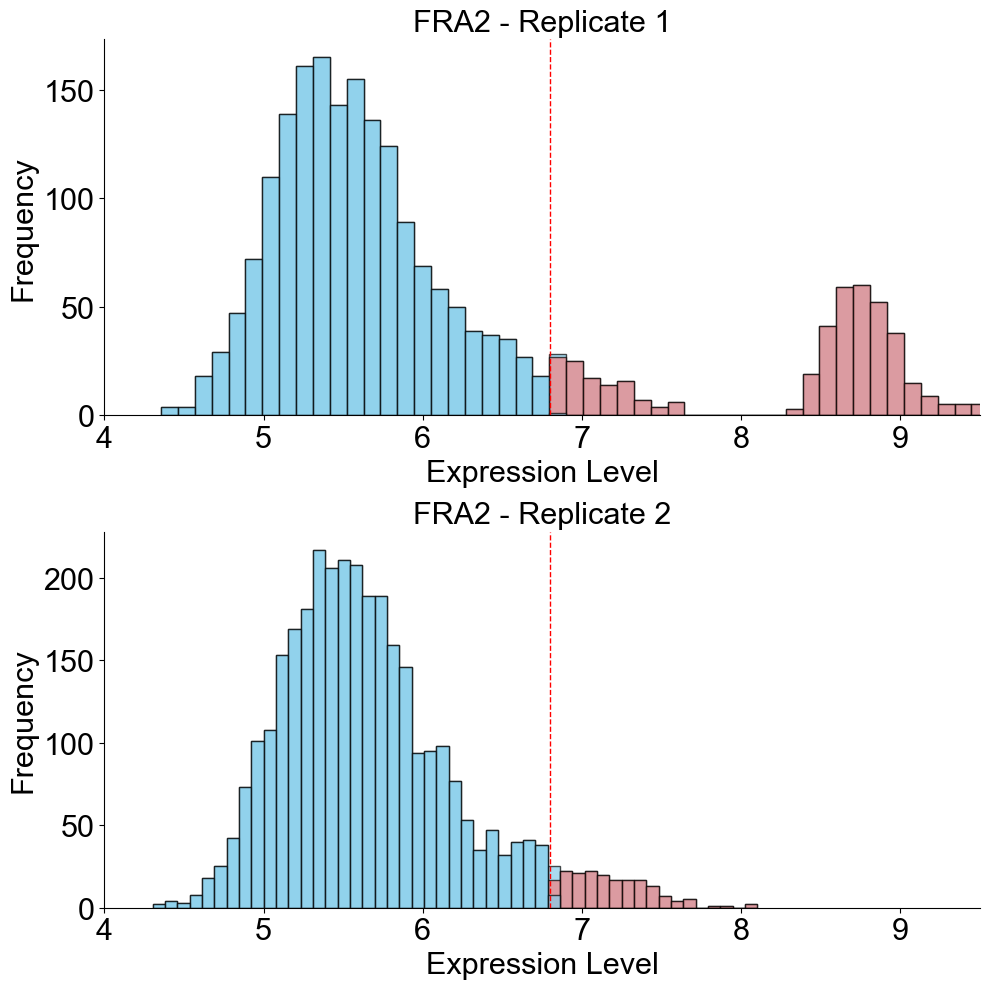

In [12]:
# plot distribution of AP1s
# select COLO858 cell_line from ap1_select
ap1_select_colo858 = ap1_select[ap1_select["cell_line"] == "COLO858"]

def plot_histogram_with_threshold(df, protein):
    if protein not in thresholds:
        raise ValueError(f"Protein '{protein}' is not in the threshold definitions.")

    threshold = thresholds[protein]['high']
    unique_replicates = df['replicate_id'].unique()
    num_replicates = len(unique_replicates)

    fig, axes = plt.subplots(num_replicates, 1, figsize=(10, 5 * num_replicates))

    if num_replicates == 1:
        axes = [axes]

    for ax, replicate_id in zip(axes, unique_replicates):
        replicate_data = df[df['replicate_id'] == replicate_id][protein]
        bins = np.linspace(replicate_data.min(), replicate_data.max(), 50)

        # Plot histogram
        ax.hist(replicate_data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
        
        # Add dashed line for the threshold
        ax.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
        # set x limit from 2 to 12
        ax.set_xlim(4, 9.5)
        # Highlight regions
        ax.hist(replicate_data[replicate_data > threshold], bins=bins, color='lightcoral', edgecolor='black', alpha=0.7)
        ax.hist(replicate_data[replicate_data <= threshold], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
        
        ax.set_title(f'{protein} - Replicate {replicate_id}')
        ax.set_xlabel('Expression Level')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histogram_with_threshold(ap1_select_colo858, 'FRA2')


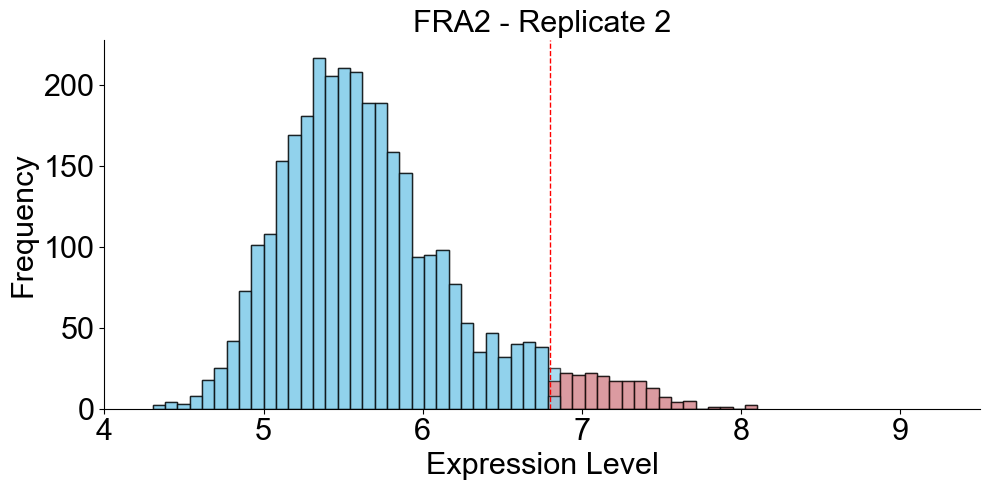

In [13]:
# remove replicate_id 1 for FRA2 in COLO858
mask = ~((ap1_select['replicate_id'] == 1) & (ap1_select['cell_line'] == 'COLO858') & (ap1_select['FRA2'].notna()))

# Apply the mask to create a new DataFrame
ap1_select_filtered = ap1_select.loc[mask].copy()

# Reset the index of the new DataFrame
ap1_select_filtered.reset_index(drop=True, inplace=True)
# select the cell_line COLO858 from ap1_select_filtered
ap1_select_filtered_colo858 = ap1_select_filtered[ap1_select_filtered["cell_line"] == "COLO858"]
plot_histogram_with_threshold(ap1_select_filtered_colo858, 'FRA2')


In [14]:
# #density plot for each protein across all cell lines or selected cell lines
# def plot_protein_distributions_by_cellline(df, proteins, cell_lines, thresholds):
#     """
#     Create a grid of density plots showing protein distributions by cell line,
#     with a single curve shaded differently on each side of the threshold.
#     Y-axis standardized with maximum at exactly 1.5.
    
#     Args:
#         df: DataFrame containing the data
#         proteins: List of protein names to plot
#         cell_lines: List of cell lines to include
#         thresholds: Dictionary of thresholds for each protein
#     """
#     # Set up the figure and axes
#     fig, axes = plt.subplots(len(cell_lines), len(proteins), 
#                             figsize=(5*len(proteins), 4*len(cell_lines)),
#                             constrained_layout=True)
    
#     # Set fixed maximum y-value
#     max_density = 2
    
#     # Loop through each cell line (rows)
#     for i, cell_line in enumerate(cell_lines):
#         cell_data = df[df['cell_line'] == cell_line].copy()
        
#         # Loop through each protein (columns)
#         for j, protein in enumerate(proteins):
#             ax = axes[i, j]
            
#             # Get data for this cell line and protein
#             protein_data = cell_data[protein].dropna()
            
#             if len(protein_data) > 0:
#                 # Get the threshold for this protein
#                 threshold = thresholds[protein]['high']
                
#                 # Create a grid for density estimation
#                 x_grid = np.linspace(4, 10, 1000)
                
#                 # Calculate KDE for the data
#                 kde = stats.gaussian_kde(protein_data)
#                 density = kde(x_grid)
                
#                 # Find the index where x_grid crosses the threshold
#                 threshold_idx = np.searchsorted(x_grid, threshold)
                
#                 # Plot the density with different colors on each side of the threshold
#                 # Low expression (blue)
#                 ax.fill_between(x_grid[:threshold_idx], density[:threshold_idx], 
#                                color='#266DD3', alpha=0.7, label='Low')
                
#                 # High expression (red)
#                 ax.fill_between(x_grid[threshold_idx:], density[threshold_idx:], 
#                                color='#B32328', alpha=0.7, label='High')
                
#                 # Add the density curve on top
#                 ax.plot(x_grid, density, color='black', linewidth=1)
                
#                 # Add threshold line
#                 ax.axvline(threshold, color='black', linestyle='dashed', linewidth=1)
            
#             # Standardize axis limits and ticks
#             ax.set_xlim(4, 10)
#             ax.set_ylim(0, max_density)  # Set exact limit to match highest tick
#             ax.set_yticks([0, 0.5, 1.0, 1.5,2])
            
#             # Clean up axes
#             ax.spines['top'].set_visible(False)
#             ax.spines['right'].set_visible(False)
            
#             # Add cell line label on the left side
#             if j == 0:
#                 ax.set_ylabel(cell_line)
            
#             # Add protein label on top
#             if i == 0:
#                 ax.set_title(protein)
            
#             # Add legend to first plot only
#             if i == 0 and j == 0:
#                 ax.legend()
    
#     # Add common x and y labels
#     fig.supxlabel('log (a.u)', fontsize=20)
#     fig.supylabel('Density', fontsize=20)
    
#     #plt.savefig('Fig2Supp_ap1_protein_density_fixed_scale.pdf', format='pdf', bbox_inches='tight', dpi=300)
#     return fig
# # Define the proteins and cell lines to plot
# proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']
# #cell_lines = ap1_select_filtered["cell_line"].unique()
# # if you want to plot only the cell lines COLO858, WM902B, and LOXIMVI
# cell_lines = ['COLO858', 'WM902B', 'LOXIMVI']
# # Call the function with your ap1_select_filtered dataframe
# dplot = plot_protein_distributions_by_cellline(ap1_select_filtered, proteins, cell_lines, thresholds)

#### Fig 1B (UMAP)

In [15]:
final_df = ap1_select_500.copy()
ap1_cols    = ['cFOS','cJUN','FRA1','FRA2','JUND']
other_cols  = ['MITF','SOX10']
all_cols    = ap1_cols + other_cols

# 2) scale everything at once
scaler = StandardScaler()
final_df[all_cols] = scaler.fit_transform(final_df[all_cols])

# 3) PCA **retaining all 5** AP-1 components
pca = PCA(n_components=len(ap1_cols), random_state=42)
pcs = pca.fit_transform(final_df[ap1_cols])   # shape = (n_cells, 5)

# 4) Add PC1…PC5 back to your DataFrame
pc_names = [f'PC{i+1}' for i in range(pcs.shape[1])]
final_df[pc_names] = pcs
print("Explained variance by PC:", pca.explained_variance_ratio_)

Explained variance by PC: [0.40728934 0.21730443 0.17447638 0.14206554 0.05886432]


/Users/njr7jk/opt/anaconda3/envs/ap1_proj/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


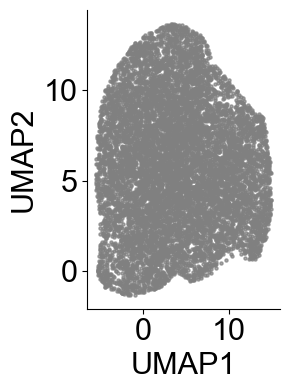

In [16]:
# 1) Select PC1, PC2, PC3
pc_cols = ['PC1','PC2','PC3']
X_pc3 = final_df[pc_cols].values    # shape = (n_cells, 3)

# 2) UMAP on 3-dim PCA space
umap_3 = UMAP(
    n_neighbors=90,
    min_dist=0.7,
    n_components=2,
    metric='euclidean',
    random_state=42
)
u3 = umap_3.fit_transform(X_pc3)

# 3) Store new UMAP coords
final_df['UMAP1_3PC'] = u3[:,0]
final_df['UMAP2_3PC'] = u3[:,1]

# 4) Quick plot
plt.figure(figsize=(3,4))
plt.scatter(final_df['UMAP1_3PC'], final_df['UMAP2_3PC'],
            s=5, alpha=0.7, c='gray')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.tight_layout()
plt.show()

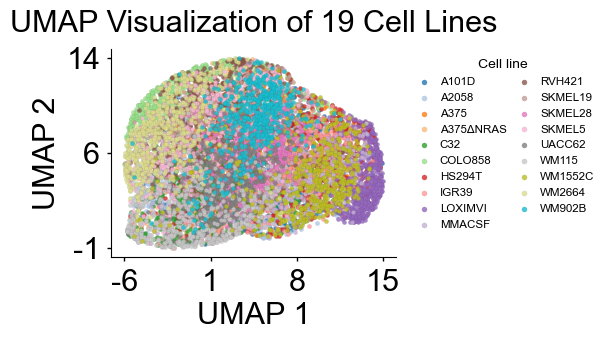

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# 0) pick a qualitative palette
num_lines = final_df['cell_line'].nunique()
palette = sns.color_palette('tab20', num_lines)

# 1) compute your data extents & tick positions
x = final_df['UMAP1_3PC']
y = final_df['UMAP2_3PC']
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
xticks = np.linspace(x_min, x_max, 4)  # 4 ticks on x
yticks = np.linspace(y_min, y_max, 3)  # 3 ticks on y

# 2) build the figure
fig, ax = plt.subplots(figsize=(6, 6))

# 3) scatter each cell line with black borders
for col, line in zip(palette, final_df['cell_line'].unique()):
    sub = final_df[final_df['cell_line'] == line]
    ax.scatter(
        sub['UMAP1_3PC'], sub['UMAP2_3PC'],
        s=10,
        facecolors=col,
        edgecolors='black',
        linewidths=0.03,
        label=line,
        alpha=0.8
    )

# 4) preserve geometry and clean up spines
ax.set_aspect('equal', adjustable='box')


# 5) apply the data‑based tick positions
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 6) bring back tick lines (major ticks inward)
ax.tick_params(
    axis='both',
    which='major',
    length=3,
    width=1,
    direction='out',  # ticks outward; use 'inout' if you prefer both directions
    colors='black',
    top=False,  # no ticks on top side
    right=False,  # no ticks on right side
    bottom=True,
    left=True,
    pad=5  # adds spacing between ticks and labels
)

# 7) round tick labels to integers
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 8) compact, two‑column legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, labels,
    title='Cell line',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    markerscale=1.2,
    scatterpoints=1,
    ncol=2,
    fontsize='small',
    handletextpad=0.4,
    columnspacing=0.5
)

# 9) labels, title, caption
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('UMAP Visualization of 19 Cell Lines', pad=12)


# 10) layout and show
plt.tight_layout(rect=(0, 0.03, 1, 1))
#plt.savefig('Figure_umap_3pc.pdf', dpi=300, bbox_inches='tight')
plt.show()


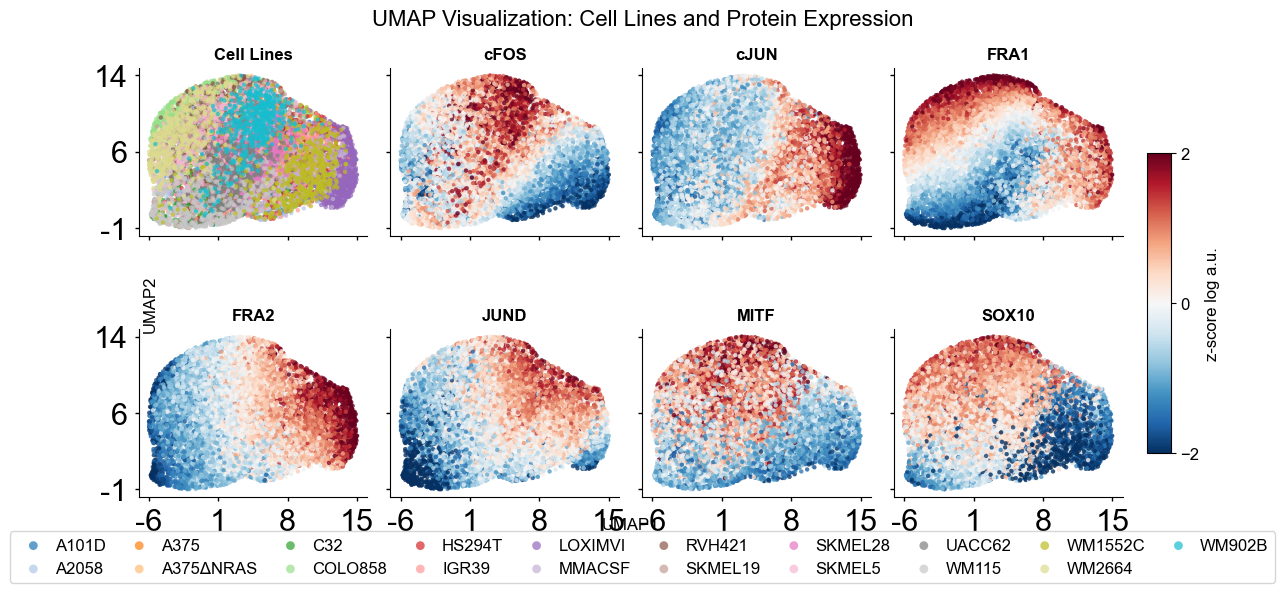

In [18]:
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

# Define proteins
proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND', 'MITF', 'SOX10']

# Calculate plot extent & ticks
x = final_df['UMAP1_3PC']
y = final_df['UMAP2_3PC']
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
xticks = np.linspace(x_min, x_max, 4)
yticks = np.linspace(y_min, y_max, 3)

# Set figure with shared axes
fig, axes = plt.subplots(2, 4, figsize=(12, 6), constrained_layout=False, 
                        sharex=True, sharey=True)
plt.subplots_adjust(top=0.92, bottom=0.15, left=0.08, right=0.90, hspace=0.3, wspace=0.1)

# Palette for cell line coloring
num_lines = final_df['cell_line'].nunique()
palette = sns.color_palette('tab20', num_lines)

# First subplot (colored by cell lines)
ax0 = axes[0, 0]
for col, line in zip(palette, final_df['cell_line'].unique()):
    sub = final_df[final_df['cell_line'] == line]
    ax0.scatter(
        sub['UMAP1_3PC'], sub['UMAP2_3PC'], s=10, facecolors=col,
        edgecolors='none', alpha=0.7, label=line
    )
ax0.set_title('Cell Lines', fontsize=12, fontweight='bold')

# Create horizontal legend for cell lines at the bottom
handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
          ncol=10, frameon=True, fancybox=True, shadow=False,
          markerscale=2.0, fontsize=12, handletextpad=0.3, columnspacing=1.0)

# Protein subplots
for idx, prot in enumerate(proteins):
    ax = axes.flatten()[idx + 1]
    scatter = ax.scatter(
        final_df['UMAP1_3PC'], final_df['UMAP2_3PC'], s=10,
        c=final_df[prot], cmap='RdBu_r', vmin=-2, vmax=2,
        alpha=0.8, edgecolors='none'
    )
    ax.set_title(prot, fontsize=12, fontweight='bold')

# Axis formatting (all subplots)
for i, ax in enumerate(axes.flatten()):
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Updated tick parameters
    ax.tick_params(
        axis='both',
        which='major',
        length=3,
        width=1,
        direction='out',  # ticks outward; use 'inout' if you prefer both directions
        colors='black',
        top=False,  # no ticks on top side
        right=False,  # no ticks on right side
        bottom=True,
        left=True,
        pad=5  # adds spacing between ticks and labels
    )
    
    # Only show axis labels on edge subplots for cleaner look with shared axes
    if i not in [0, 4]:  # Not in left column
        ax.set_ylabel('')
    if i not in [4, 5, 6, 7]:  # Not in bottom row
        ax.set_xlabel('')

# Add shared axis labels
fig.text(0.49, 0.13, 'UMAP1', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'UMAP2', ha='center', va='center', rotation=90, fontsize = 12)

# Vertical colorbar on the right
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])
norm = mpl.colors.Normalize(vmin=-2, vmax=2)
cb = mpl.colorbar.ColorbarBase(
    cbar_ax, cmap='RdBu_r', norm=norm, orientation='vertical', ticks=[-2, 0, 2]
)
cb.set_label('z-score log a.u.', fontsize=12)
cbar_ax.tick_params(axis='y', labelsize=12)

# Final adjustments
fig.suptitle('UMAP Visualization: Cell Lines and Protein Expression', fontsize=16, y=0.99)
#plt.savefig('Figure1SC_umap_protein_subplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### Exploring just a single cell line


In [20]:
import os 
def plot_umap_single_cell_line(final_df, cell_line, proteins=None, 
                               figsize=(12, 6), save_fig=True, 
                               output_dir='', dpi=300):
    
    
    # Default proteins if not specified
    if proteins is None:
        proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND', 'MITF', 'SOX10']
    
    # Check if cell line exists
    if cell_line not in final_df['cell_line'].unique():
        raise ValueError(f"Cell line '{cell_line}' not found. Available: {final_df['cell_line'].unique()}")
    
    # Calculate plot extent & ticks
    x = final_df['UMAP1_3PC']
    y = final_df['UMAP2_3PC']
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    xticks = np.linspace(x_min, x_max, 4)
    yticks = np.linspace(y_min, y_max, 3)
    
    # Separate data
    selected_df = final_df[final_df['cell_line'] == cell_line]
    other_df = final_df[final_df['cell_line'] != cell_line]
    
    print(f"Plotting {len(selected_df)} cells from {cell_line} (out of {len(final_df)} total)")
    
    # Set figure with shared axes
    fig, axes = plt.subplots(2, 4, figsize=figsize, constrained_layout=False, 
                            sharex=True, sharey=True)
    plt.subplots_adjust(top=0.92, bottom=0.15, left=0.08, right=0.90, hspace=0.3, wspace=0.1)
    
    # First subplot - highlight selected cell line
    ax0 = axes[0, 0]
    # Plot other cell lines in light gray
    ax0.scatter(
        other_df['UMAP1_3PC'], other_df['UMAP2_3PC'], s=10, 
        facecolors='lightgray', edgecolors='none', alpha=0.3, label='Other cell lines'
    )
    # Plot selected cell line in a distinct color
    ax0.scatter(
        selected_df['UMAP1_3PC'], selected_df['UMAP2_3PC'], s=10, 
        facecolors='#E74C3C', edgecolors='none', alpha=0.8, label=cell_line
    )
    ax0.set_title(f'{cell_line} vs Others', fontsize=12, fontweight='bold')
    ax0.legend(loc='best', frameon=True, fontsize=10, markerscale=2.0)
    
    # Protein subplots
    for idx, prot in enumerate(proteins):
        ax = axes.flatten()[idx + 1]
        
        # Plot other cell lines in light gray background
        ax.scatter(
            other_df['UMAP1_3PC'], other_df['UMAP2_3PC'], s=10,
            facecolors='lightgray', edgecolors='none', alpha=0.2
        )
        
        # Plot selected cell line with protein expression coloring
        scatter = ax.scatter(
            selected_df['UMAP1_3PC'], selected_df['UMAP2_3PC'], s=10,
            c=selected_df[prot], cmap='RdBu_r', vmin=-2, vmax=2,
            alpha=0.8, edgecolors='none'
        )
        ax.set_title(prot, fontsize=12, fontweight='bold')
    
    # Axis formatting (all subplots)
    for i, ax in enumerate(axes.flatten()):
        ax.set_aspect('equal', adjustable='box')
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.tick_params(
            axis='both',
            which='major',
            length=3,
            width=1,
            direction='out',
            colors='black',
            top=False,
            right=False,
            bottom=True,
            left=True,
            pad=5
        )
        
        # Only show axis labels on edge subplots
        if i not in [0, 4]:
            ax.set_ylabel('')
        if i not in [4, 5, 6, 7]:
            ax.set_xlabel('')
    
    # Add shared axis labels
    fig.text(0.49, 0.13, 'UMAP1', ha='center', va='center', fontsize=12)
    fig.text(0.09, 0.5, 'UMAP2', ha='center', va='center', rotation=90, fontsize=12)
    
    # Vertical colorbar on the right
    cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])
    norm = mpl.colors.Normalize(vmin=-2, vmax=2)
    cb = mpl.colorbar.ColorbarBase(
        cbar_ax, cmap='RdBu_r', norm=norm, orientation='vertical', ticks=[-2, 0, 2]
    )
    cb.set_label('z-score log a.u.', fontsize=12)
    cbar_ax.tick_params(axis='y', labelsize=12)
    
    # Final adjustments
    fig.suptitle(f'UMAP Visualization: {cell_line} Protein Expression', fontsize=16, y=0.99)
    
    # Save figure if requested
    if save_fig:
        filename = f'Figure1SC_umap_protein_subplot_{cell_line}.pdf'
        if output_dir:
            filename = os.path.join(output_dir, filename)
        plt.savefig(filename, dpi=dpi, bbox_inches='tight')
        print(f"Figure saved: {filename}")
    
    plt.show()
    
    return fig, axes

Plotting 500 cells from MMACSF (out of 9500 total)


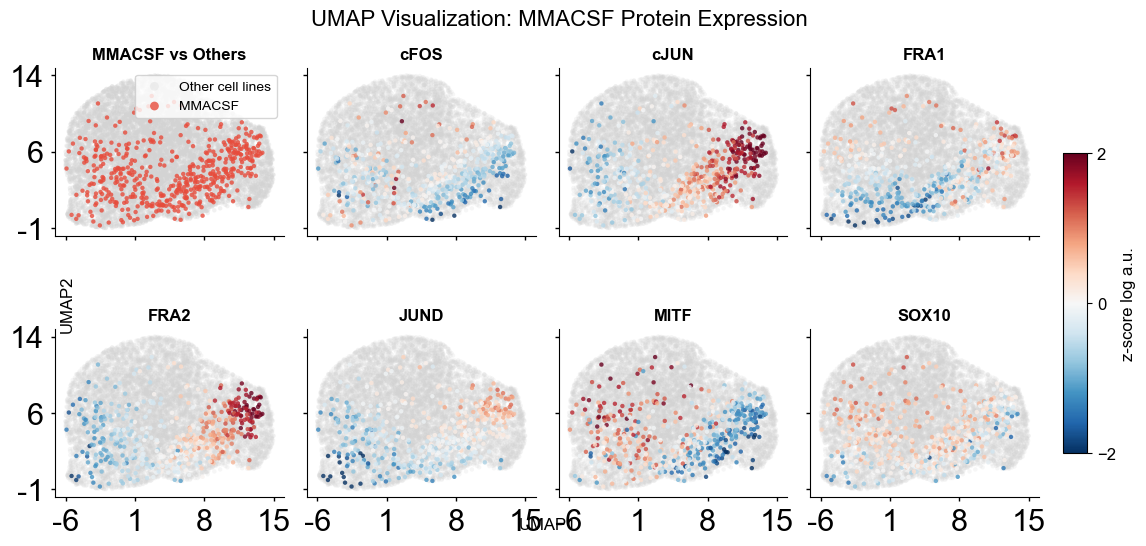

In [23]:
fig, axes = plot_umap_single_cell_line(final_df, 'MMACSF',save_fig=False)

#### Figure S1A Violin plot with thresholds

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_protein_violin_by_cellline(df, proteins, cell_lines, thresholds):
    """
    Create violin plots in a 2-column grid with shared x-axes and rotated, readable labels.

    Args:
        df: DataFrame containing the data
        proteins: List of protein names to plot
        cell_lines: (unused) List of cell lines to include (order is overridden)
        thresholds: Dictionary of thresholds for each protein
    Returns:
        fig: The matplotlib Figure object
    """
    # Desired x-axis order
    cell_order = ['SKMEL5','RVH421','WM2664','COLO858','SKMEL19',
                  'C32','WM115','SKMEL28','UACC62','A375ΔNRAS',
                  'WM902B','A375','A101D','A2058','MMACSF','IGR39',
                  'LOXIMVI','HS294T','WM1552C']

    n_plots = len(proteins)
    ncols = 2
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(12, 4 * nrows),
        constrained_layout=True,
        sharex=True
    )
    axes = axes.flatten()

    positions = list(range(len(cell_order)))

    for i, protein in enumerate(proteins):
        ax = axes[i]

        # Gather data
        plot_data = [
            df.loc[df['cell_line'] == cell, protein].dropna()
            for cell in cell_order
        ]
        quartiles = [tuple(np.percentile(d, [25, 50, 75])) for d in plot_data]

        # Plot violin
        parts = ax.violinplot(
            plot_data,
            positions=positions,
            showmeans=False,
            showextrema=False,
            widths=0.8
        )
        for pc in parts['bodies']:
            pc.set_facecolor('navy')
            pc.set_alpha(1)

        # Quartile lines
        for pos, (q1, med, q3) in zip(positions, quartiles):
            ax.hlines([q1, med, q3], [pos - 0.07]*3, [pos + 0.07]*3,
                      colors='yellow', linewidth=0.5)

        # Optional threshold
        if protein in thresholds:
            thresh = thresholds[protein]['high']
            ax.axhline(thresh, linestyle='--', linewidth=1, color='black')

        # Remove title and use protein name as y-label
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.set_yticks([4, 5.25, 6.5, 7.75, 9])
        ax.set_yticklabels(['4.0', '5.25', '6.5', '7.75', '9.0'])
        ax.set_ylabel(protein)

    # Hide unused axes
    for j in range(n_plots, len(axes)):
        axes[j].set_visible(False)

    # Shared x-axis labels only on bottom row
    for idx, ax in enumerate(axes[:n_plots]):
        if idx // ncols == nrows - 1:
            ax.set_xticks(positions)
            ax.set_xticklabels(cell_order, rotation=90, ha='center')
        else:
            ax.set_xticks(positions)
            ax.set_xticklabels([])

    # Save & show
    pdf_path = '2A_protein_violin_plot.pdf'
    fig.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.show()

    return fig

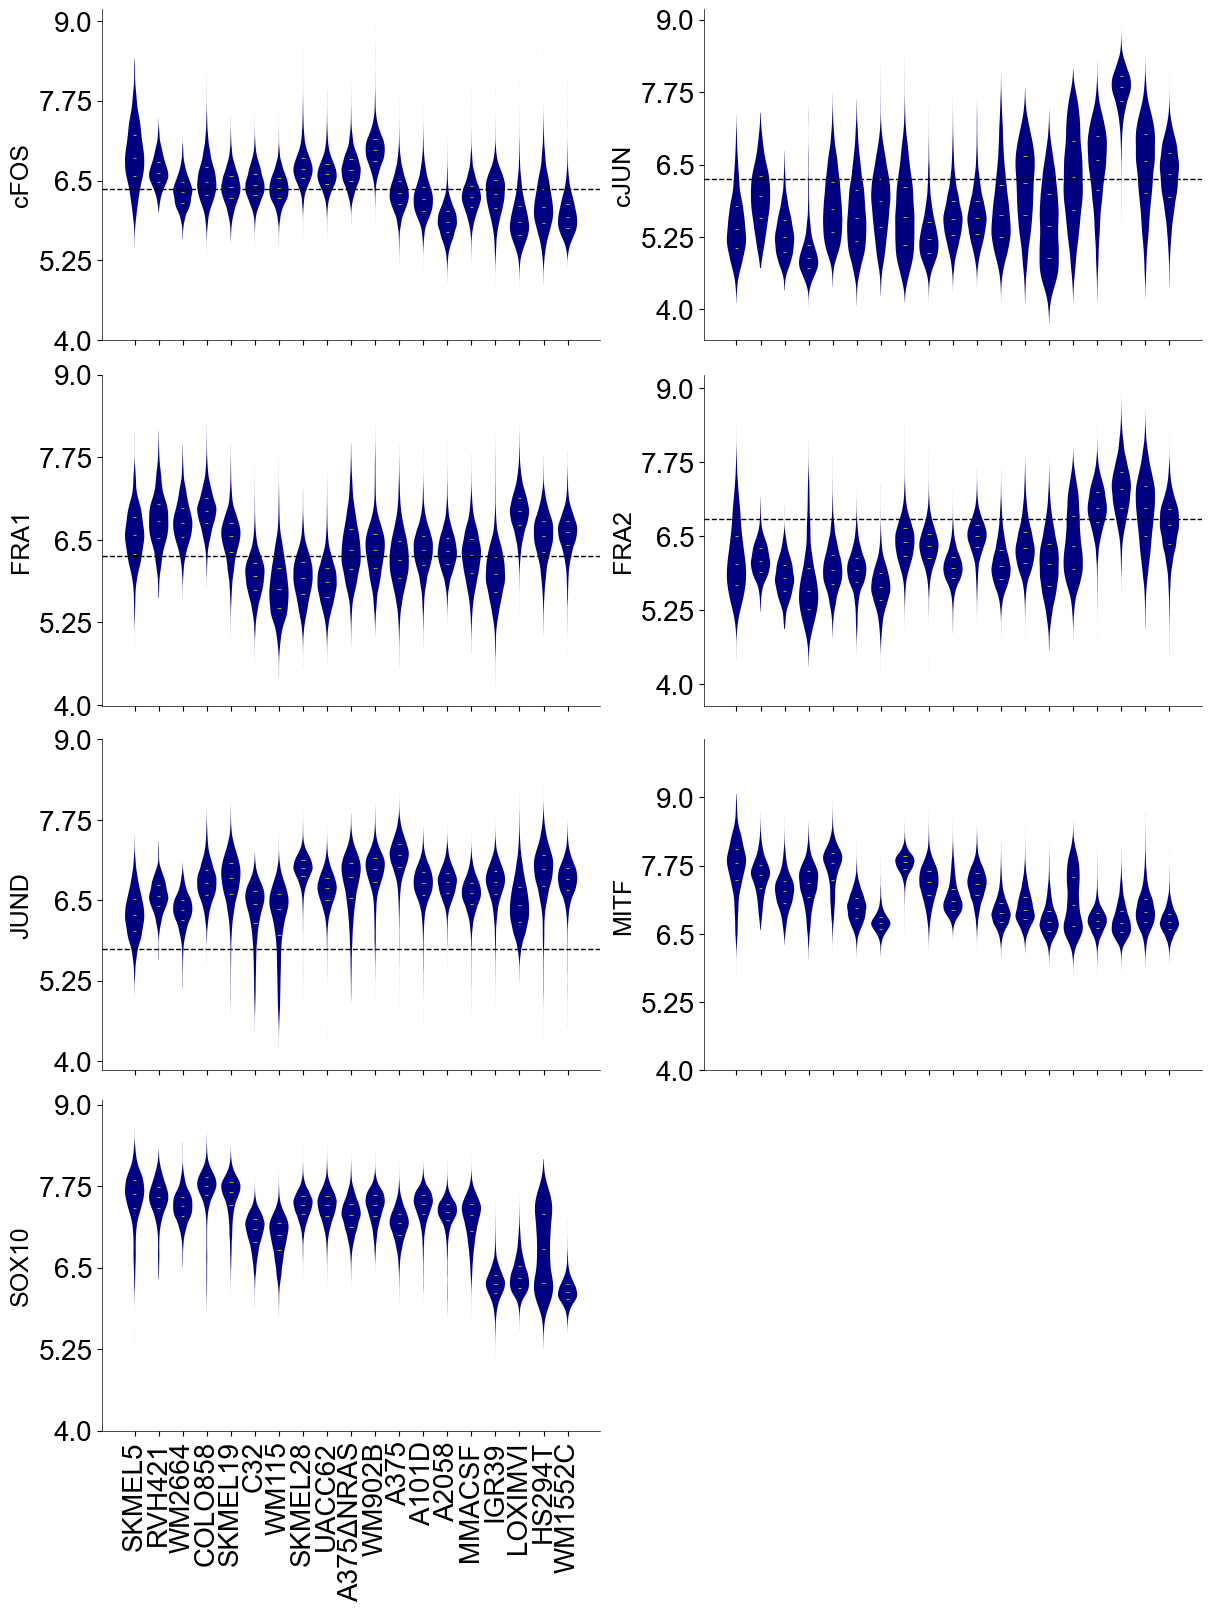

In [17]:
proteins = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND','MITF','SOX10']
cell_lines = ap1_select_filtered["cell_line"].unique()
vplot = plot_protein_violin_by_cellline(ap1_select_filtered,proteins,cell_lines,thresholds)

In [16]:
# Group by 'cell_line' and 'replicate_id', then count the unique states in each group
unique_states = ap1_select_filtered.groupby(['cell_line', 'replicate_id'])['state'].nunique().reset_index(name='unique_states')

unique_states

,cell_line,replicate_id,unique_states
0,A101D,1,20
1,A101D,2,20
2,A2058,1,16
3,A2058,2,17
4,A375,1,19
5,A375,2,17
6,A375ΔNRAS,1,15
7,A375ΔNRAS,2,14
8,C32,1,17
9,C32,2,19


In [15]:
# old code
# First we group by 'cell_line' and 'replicate_id' and gather the unique 'state' for each group
# unique_states = ap1_select.groupby(['cell_line', 'replicate_id'])['state'].apply(set)

# # Reset index to make 'cell_line' and 'replicate_id' as columns again
# unique_states = unique_states.reset_index()

# # Separate the dataframes for replicate 1 and 2
# rep1_states = unique_states[unique_states['replicate_id'] == 1].set_index('cell_line')[
#     'state']
# rep2_states = unique_states[unique_states['replicate_id'] == 2].set_index('cell_line')[
#     'state']

# # Compute the intersection between the states of the two replicates
# common_states = rep1_states.combine(
#     rep2_states, lambda s1, s2: s1.intersection(s2))

# # Compute the number of common states
# num_common_states = common_states.apply(len)

# #convert common states into a dataframe
# common_states_df = pd.DataFrame(common_states)
# common_states_df


In [17]:
# Create a unique set of states for each cell_line and replicate_id
unique_states = ap1_select_filtered.groupby(['cell_line', 'replicate_id'])['state'].apply(set)

# Reset index to make 'cell_line' and 'replicate_id' as columns again
unique_states = unique_states.reset_index()

# Group by cell_line to find the common states across all replicates for each cell line
def find_common_states(states):
    # Initialize with the first replicate's states
    common = states.iloc[0]
    # Iterate through the rest of the replicates and find the intersection
    for state_set in states.iloc[1:]:
        common = common.intersection(state_set)
    return common

# Apply the function to find common states across replicates for each cell line
common_states = unique_states.groupby('cell_line')['state'].apply(find_common_states)

# Compute the number of common states
num_common_states = common_states.apply(len)

# Convert common states into a dataframe
common_states_df = pd.DataFrame({'state': common_states})

# Display the result
common_states_df

,state
cell_line,
A101D,"{(low, low, low, high, high), (high, high, hig..."
A2058,"{(low, low, low, high, high), (high, low, high..."
A375,"{(low, low, low, high, high), (high, low, low,..."
A375ΔNRAS,"{(high, low, high, low, low), (high, high, hig..."
C32,"{(high, low, low, low, high), (high, low, high..."
COLO858,"{(high, low, low, low, high), (low, low, low, ..."
HS294T,"{(low, low, low, high, high), (high, low, low,..."
IGR39,"{(low, low, low, high, high), (high, low, low,..."
LOXIMVI,"{(low, low, low, high, high), (high, high, hig..."


In [18]:
# Calculate frequency of each state in each replicate for each cell line
state_freq = ap1_select_filtered.groupby(['cell_line', 'replicate_id', 'state']).size()
state_freq = state_freq / state_freq.groupby(level=[0, 1]).sum() * 100

# Reset index to make 'cell_line', 'replicate_id', and 'state' as columns again
state_freq = state_freq.reset_index().rename(columns={0: 'frequency'})

# Separate the dataframes for replicate 1 and 2
rep1_freq = state_freq[state_freq['replicate_id'] ==
                       1].set_index(['cell_line', 'state'])['frequency']
rep2_freq = state_freq[state_freq['replicate_id'] ==
                       2].set_index(['cell_line', 'state'])['frequency']

# Initialize an empty dataframe to store average frequencies
# average_freq_df = pd.DataFrame()

# # Iterate over common states for each cell line
# for cell_line, states in common_states.items():
#     for state in states:
#         # Get the frequency in rep1 and rep2
#         freq1 = rep1_freq.get((cell_line, state))
#         freq2 = rep2_freq.get((cell_line, state))
#         # Calculate average frequency
#         avg_freq = np.nanmean([freq1, freq2])
#         # Append to the result dataframe
#         average_freq_df = average_freq_df.append(pd.DataFrame(
#             {'cell_line': [cell_line], 'state': [state], 'average_frequency': [avg_freq]}))

# # Reset index
# average_freq_df = average_freq_df.reset_index(drop=True)
# explicity handle missing replicate data
average_freq_list = []
for cell_line, states in common_states.items():
    for state in states:
        freq1 = rep1_freq.get((cell_line, state))
        freq2 = rep2_freq.get((cell_line, state))
        if freq1 is not None and freq2 is not None:
            avg_freq = np.mean([freq1, freq2])
        elif freq1 is not None:
            avg_freq = freq1
        elif freq2 is not None:
            avg_freq = freq2
        else:
            avg_freq = np.nan  # or some other value to indicate missing data
        
        average_freq_list.append({
            'cell_line': cell_line, 
            'state': state, 
            'average_frequency': avg_freq
            #'replicates_averaged': 2 if (freq1 is not None and freq2 is not None) else 1
        })

# Convert the list to a DataFrame
average_freq_df = pd.DataFrame(average_freq_list)
# average_freq_df['cell_line'] = average_freq_df['cell_line'].replace({
#     'A375 _x001A_NRAS(Q61K)': 'A375_NRAS(Q61K)'
# })


In [19]:
average_freq_df

,cell_line,state,average_frequency
0,A101D,"(low, low, low, high, high)",0.295214
1,A101D,"(high, high, high, low, high)",6.065536
2,A101D,"(high, low, high, low, high)",6.476103
3,A101D,"(low, high, low, high, high)",1.553594
4,A101D,"(high, low, high, low, low)",0.084037
...,...,...,...
298,WM902B,"(high, high, low, high, high)",0.866187
299,WM902B,"(high, high, high, low, high)",2.762558
300,WM902B,"(high, low, high, high, high)",7.634653
301,WM902B,"(low, high, high, high, high)",0.166596


In [20]:
ap1_select_filtered

,cell_line,replicate_id,cFOS,cJUN,FRA1,FRA2,JUND,MITF,SOX10,cFOS_state,cJUN_state,FRA1_state,FRA2_state,JUND_state,state
0,COLO858,2,7.147183,5.722960,6.525802,6.172763,6.597472,7.187279,7.279735,high,low,high,low,high,"(high, low, high, low, high)"
1,COLO858,2,6.765179,4.621774,7.161924,6.006806,6.549695,7.149487,7.862628,high,low,high,low,high,"(high, low, high, low, high)"
2,COLO858,2,6.739002,5.116043,6.817099,5.813044,6.904365,7.763899,7.610003,high,low,high,low,high,"(high, low, high, low, high)"
3,COLO858,2,6.286608,4.834630,6.681305,7.205439,7.302219,6.664927,6.365971,low,low,high,high,high,"(low, low, high, high, high)"
4,COLO858,2,6.337903,6.113940,7.113154,6.405335,6.856567,7.334177,7.565798,low,low,high,low,high,"(low, low, high, low, high)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115128,WM115,2,5.879766,5.320457,5.078526,5.511158,6.110060,6.127083,6.660544,low,low,low,low,high,"(low, low, low, low, high)"
115129,WM115,2,6.492230,5.560446,5.016697,5.421357,5.601450,6.570729,6.466751,high,low,low,low,low,"(high, low, low, low, low)"
115130,WM115,2,5.750218,4.238472,5.397314,4.885684,5.913369,6.157936,7.082689,low,low,low,low,high,"(low, low, low, low, high)"
115131,WM115,2,6.715969,5.519622,4.393129,5.373734,5.525268,6.246150,6.017869,high,low,low,low,low,"(high, low, low, low, low)"


#### Figure S1B

In [21]:
def plot_heatmaps(average_freq_df, return_order=False):
    # Custom cell line order as specified
    cell_order = ['SKMEL5','RVH421','WM2664','COLO858','SKMEL19',
                  'C32','WM115','SKMEL28','UACC62','A375ΔNRAS',
                  'WM902B','A375','A101D','A2058','MMACSF','IGR39','LOXIMVI',
                  'HS294T','WM1552C']
    
    # --- build the pivot table as before ---
    pivot_df = average_freq_df.pivot_table(
        index='state',
        columns='cell_line',
        values='average_frequency',
        fill_value=0
    )
    
    # --- use custom cell order instead of clustering ---
    # Filter to only include cell lines that exist in the data
    available_cells = [cell for cell in cell_order if cell in pivot_df.columns]
    pivot_df = pivot_df[available_cells]
    
    # --- create the figure with adjusted spacing (scaled down) ---
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    plt.subplots_adjust(bottom=0.2, right=0.95)
    
    # --- first heatmap (frequency) ---
    white_black_cmap = LinearSegmentedColormap.from_list('wb', ["white", "black"])
    
    annot_array = pivot_df.copy()
    # Convert to annotations with conditional formatting
    for i in range(len(annot_array.index)):
        for j in range(len(annot_array.columns)):
            value = annot_array.iloc[i, j]
            if value == 0 or round(value, 1) == 0:
                annot_array.iloc[i, j] = ''  # No annotation for 0 values or values that round to 0
            elif 0 < value <= 1:
                annot_array.iloc[i, j] = f'{value:.1f}'  # 1 decimal place for 0-1
            else:
                annot_array.iloc[i, j] = f'{value:.0f}'  # No decimal places for >1

    
    sns.heatmap(
        pivot_df,
        cmap=white_black_cmap,
        ax=ax1,
        annot=annot_array,
        fmt='',  # Use empty format since we're providing strings
        linewidths=.03,
        linecolor="black",
        square=False,
        yticklabels=False,
        cbar=False,
        annot_kws={'weight': 'bold','fontsize':12}
    )
    ax1.set_xlabel(""); ax1.set_ylabel("")
    
    # --- vertical colorbar on the right side of first heatmap ---
    cbar_ax1 = fig.add_axes([0.5, 0.3, 0.02, 0.4])  # [left, bottom, width, height] - positioned further right
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=white_black_cmap),
                        cax=cbar_ax1, orientation='vertical')
    cbar.set_label('Average Frequency (%)', fontsize=12)
    
    # Set specific ticks at 0, 50, 100
    cbar.set_ticks([0, 0.5, 1.0])
    cbar.set_ticklabels(['0', '50', '100'])
    
    # --- second (binary) heatmap ---
    cmap = {'low': 0, 'high': 1}
    color_map = ListedColormap(['#266DD3', '#B32328'])
    state_num_df = pd.DataFrame(
        [ [cmap.get(i,0) for i in state] for state in pivot_df.index ],
        index=pivot_df.index,
        columns=['cFOS','cJUN','FRA1','FRA2','JUND']
    )
    sns.heatmap(
        state_num_df,
        cmap=color_map,
        ax=ax2,
        linewidths=.03,
        linecolor="white",
        square=True,
        yticklabels=False,
        cbar=False
    )
    ax2.set_ylabel("")
    
    # --- legend for second heatmap (positioned under it) ---
    legend_labels = [Patch(color=color_map.colors[i], label=lab)
                     for i, lab in enumerate(cmap)]
    leg = ax2.legend(handles=legend_labels,
                     bbox_to_anchor=(0.5, -0.15),
                     loc='upper center',
                     title='AP1 States',
                     fontsize='x-large')
    leg.get_title().set_fontsize('x-large')
    
    # save the figuree
    plt.savefig('S1B_heatmap_protein_expression.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    # --- if caller wants the order, return it ---
    if return_order:
        return available_cells

In [22]:
totals = (
    average_freq_df
    .groupby("cell_line")["average_frequency"]
    .sum()
    .reset_index(name="total_pct")
)

print(totals)

    cell_line   total_pct
0       A101D   99.957982
1       A2058   99.883593
2        A375   99.966948
3   A375ΔNRAS   99.955419
4         C32   99.952305
5     COLO858  100.000000
6      HS294T   99.873498
7       IGR39   99.912319
8     LOXIMVI   99.920350
9      MMACSF   99.879890
10     RVH421   97.157632
11    SKMEL19   99.941897
12    SKMEL28   99.979685
13     SKMEL5   99.930168
14     UACC62   99.961438
15      WM115   99.944873
16    WM1552C   99.943431
17     WM2664   99.708563
18     WM902B   99.939150


/var/folders/__/h1scybwx6txcjzlhvr2q1wwm0000gn/T/ipykernel_40779/4104564011.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_array.iloc[i, j] = f'{value:.0f}'  # No decimal places for >1
/var/folders/__/h1scybwx6txcjzlhvr2q1wwm0000gn/T/ipykernel_40779/4104564011.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_array.iloc[i, j] = f'{value:.1f}'  # 1 decimal place for 0-1
/var/folders/__/h1scybwx6txcjzlhvr2q1wwm0000gn/T/ipykernel_40779/4104564011.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, 

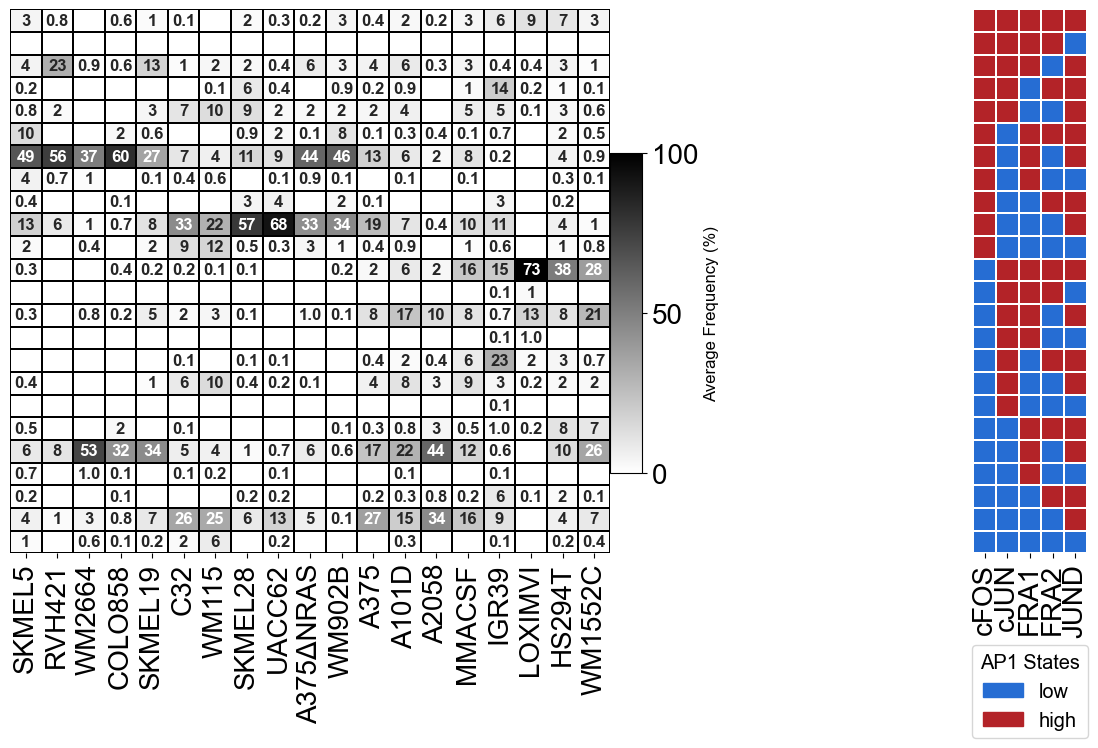

Columns plotted in this order: ['SKMEL5', 'RVH421', 'WM2664', 'COLO858', 'SKMEL19', 'C32', 'WM115', 'SKMEL28', 'UACC62', 'A375ΔNRAS', 'WM902B', 'A375', 'A101D', 'A2058', 'MMACSF', 'IGR39', 'LOXIMVI', 'HS294T', 'WM1552C']


In [37]:
ordered_cell_lines = plot_heatmaps(average_freq_df, return_order=True)
print("Columns plotted in this order:", ordered_cell_lines)


File saved to network at: /Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/AP1_mechanistic_modelling/Paper figures/filtered_avg_state_freq.pdf


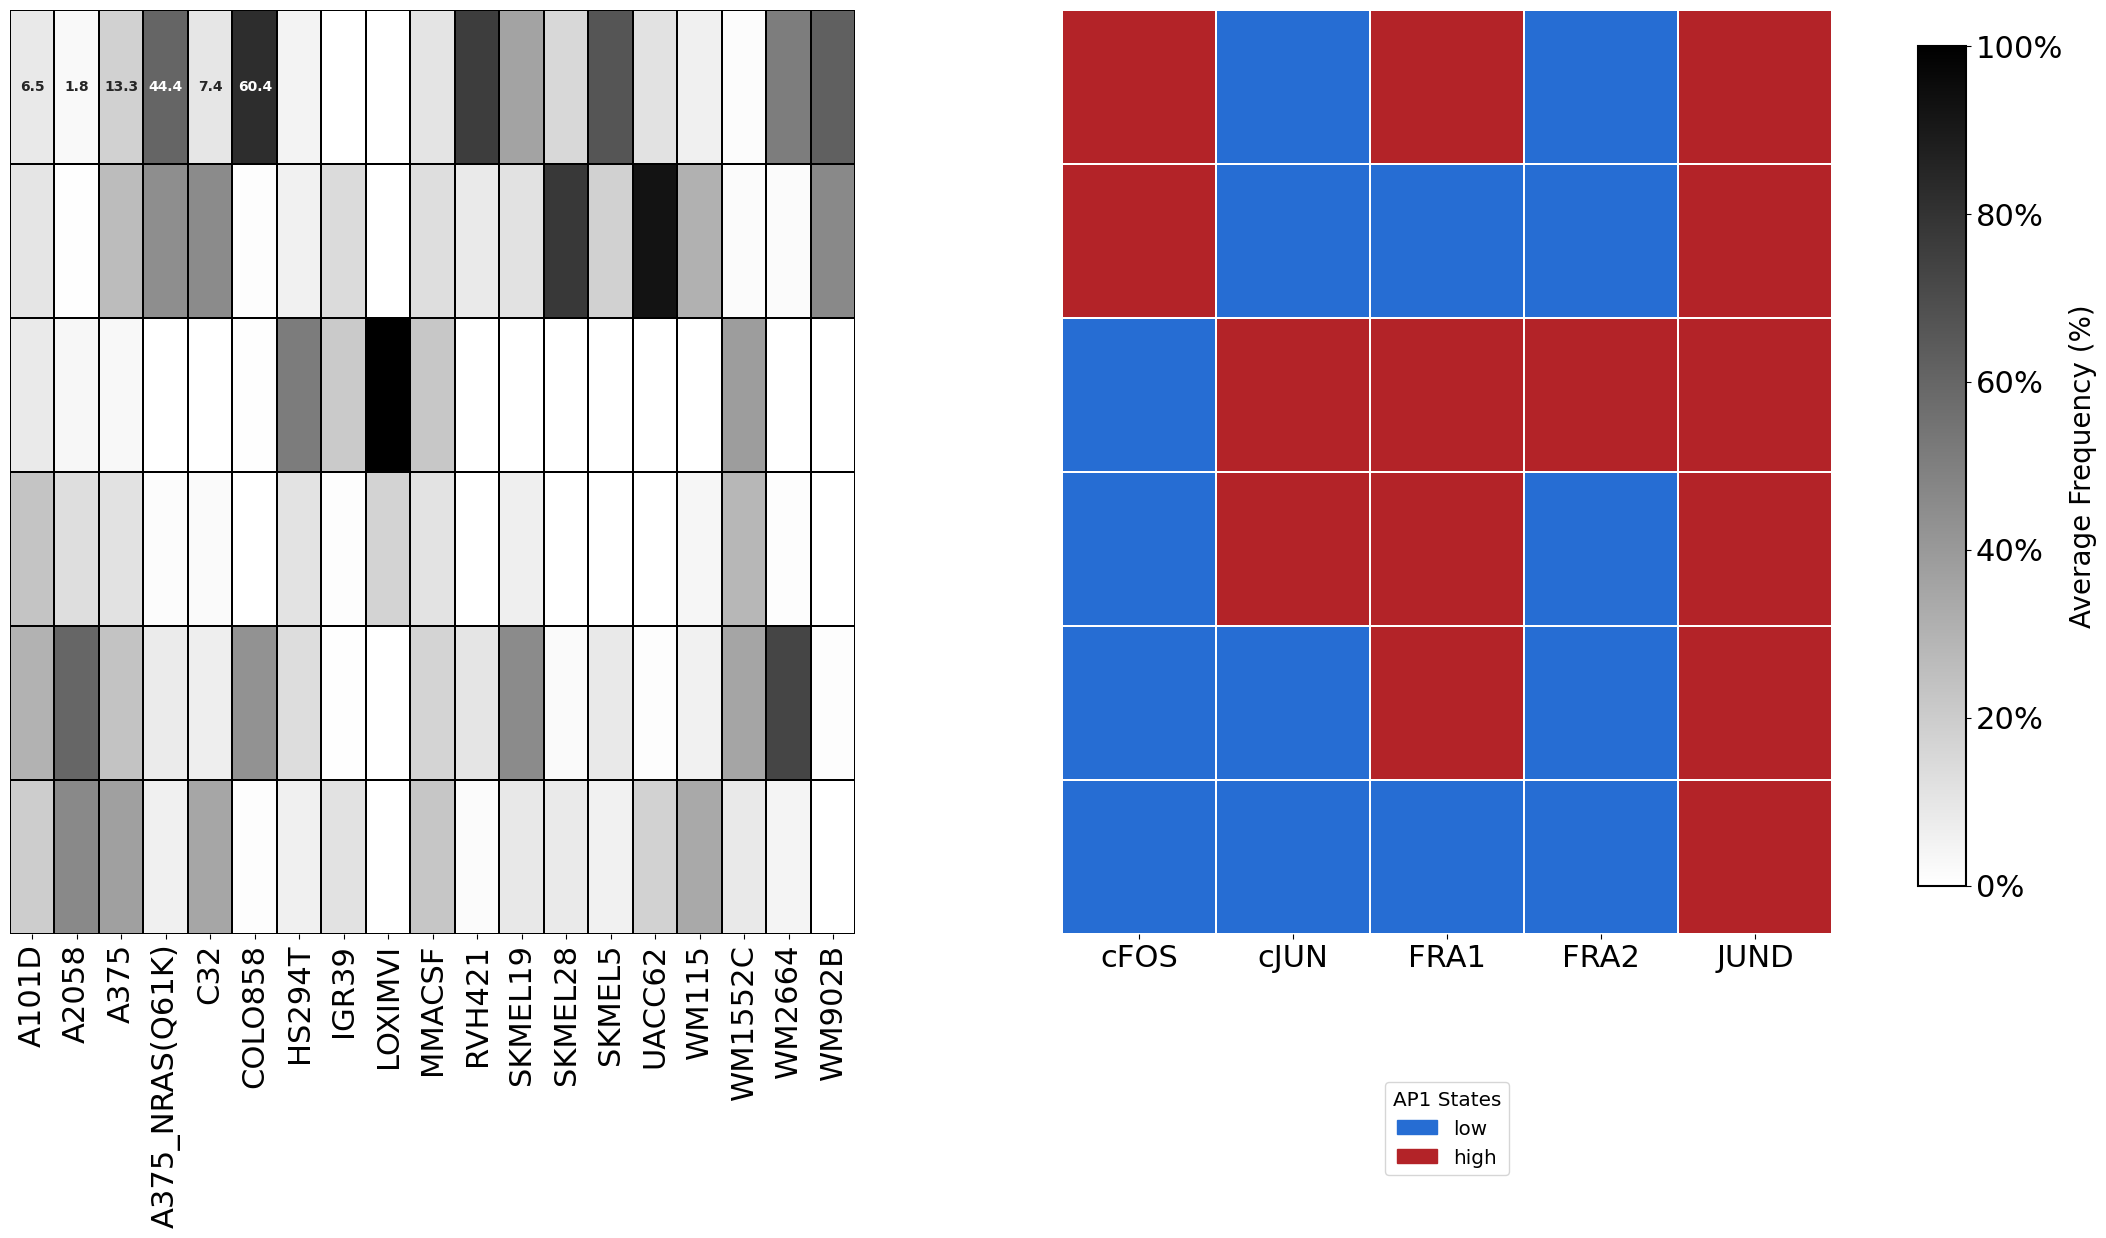

In [29]:
# exist at an averaged frequency of >0.5% in at least half of the cell lines (i.e., >9 cell lines).

grouped = average_freq_df.groupby('state').filter(
    lambda x: (x['average_frequency'] > 10).sum() >= 3)


# plot grouped
plot_heatmaps(average_freq_df=grouped)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns

def plot_dual_heatmap(pivot_freq_df, save_path=None, return_order=False):
    """
    4"x3" dual heatmap:
      - Left:  avg-frequency (%) in black/white with a short horizontal colorbar
      - Right: binary AP-1 state map

    Ordering is fixed by a predefined cell_order.
    """
    # 1) fixed column order
    cell_order = ['SKMEL5','RVH421','WM2664','COLO858','SKMEL19',
                  'C32','WM115','SKMEL28','UACC62','A375ΔNRAS',
                  'WM902B','A375','A101D','A2058','MMACSF','IGR39',
                  'LOXIMVI','HS294T','WM1552C']
    pivot = pivot_freq_df[cell_order]

    # 2) fixed-size figure 4"x3"
    n_cells = pivot.shape[1]
    fig, (ax1, ax2) = plt.subplots(
        ncols=2,
        figsize=(10, 8),
        sharey=True,
        gridspec_kw={'width_ratios': [n_cells, 5]}
    )

    # 3) left heatmap (avg freq)
    wb = LinearSegmentedColormap.from_list('wb', ['white','black'])
    sns.heatmap(
        pivot,
        cmap=wb,
        ax=ax1,
        cbar=False,
        linewidths=0.3,
        linecolor='black',
        square=True,
        yticklabels=True,
        xticklabels=True
    )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,
                        ha='right')
    ax1.set_yticklabels(ax1.get_yticklabels())
    ax1.set_xlabel(''); ax1.set_ylabel('')

    # annotate cells
    maxv = pivot.values.max()
    for i in range(pivot.shape[0]):
        for j in range(n_cells):
            v = pivot.iat[i, j]
            # Apply same conditional logic as first heatmap
            if v == 0 or round(v, 1) == 0:
                continue  # Skip annotation for 0 values or values that round to 0
            
            # Format the text based on value range
            if 0 < v <= 1:
                text = f'{v:.1f}'  # 1 decimal place for 0-1
            else:
                text = f'{v:.0f}'  # No decimal places for >1
            
            clr = 'white' if v > (maxv/2) else 'black'
            ax1.text(
                j+0.5, i+0.5, text,
                ha='center', va='center',
                color=clr, fontsize=12, weight='bold'
            )

    # 4) short horizontal colorbar under ax1
    pos = ax1.get_position()  # in figure coords
    cax = fig.add_axes([
        pos.x0 + pos.width * 0.25,
        pos.y0 - 0.10,
        pos.width * 0.5,
        0.02
    ])
    sm = plt.cm.ScalarMappable(cmap=wb)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.set_ticks([0, 0.5, 1.0])
    cbar.ax.set_xticklabels(['<5%', '50%', '100%'])
    cbar.set_label('Average Frequency (%)')

    # 5) right heatmap (binary state)
    state_map = {'low':0, 'high':1}
    rows = pivot.index.to_series().map(lambda s: [state_map[x] for x in s])
    state_df = pd.DataFrame(
        rows.tolist(),
        index=pivot.index,
        columns=['cFOS','cJUN','FRA1','FRA2','JUND']
    )
    cmap2 = ListedColormap(['#266DD3','#B32328'])
    sns.heatmap(
        state_df,
        cmap=cmap2,
        ax=ax2,
        cbar=False,
        linewidths=0.3,
        linecolor='white',
        square=True,
        yticklabels=False,
        xticklabels=True
    )
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                        ha='right')
    ax2.set_xlabel(''); ax2.set_ylabel('')

    # legend for binary map
    handles = [
        plt.Line2D([0],[0], marker='s', color='w',
                   markerfacecolor=cmap2.colors[i],
                   markersize=12, label=lab)
        for i, lab in enumerate(state_map)
    ]
    ax2.legend(
        handles=handles,
        title='AP1 States',
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2
    )

    plt.subplots_adjust(left=0.12, right=0.95,
                        top=0.95, bottom=0.18, wspace=0.05)

    # 6) save & show
    if save_path:
        try:
            fig.savefig(save_path, format='pdf',
                        bbox_inches='tight', dpi=300)
            print(f"Saved to {save_path}")
        except Exception as e:
            print(f"Save failed: {e}")
    plt.show()

    if return_order:
        return cell_order


Saved to 1B_network_heatmap.pdf


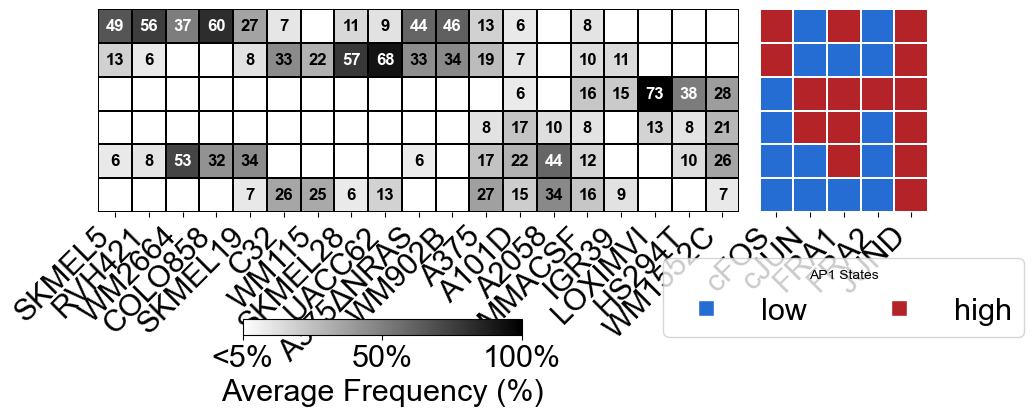

Plotted columns in this order: ['SKMEL5', 'RVH421', 'WM2664', 'COLO858', 'SKMEL19', 'C32', 'WM115', 'SKMEL28', 'UACC62', 'A375ΔNRAS', 'WM902B', 'A375', 'A101D', 'A2058', 'MMACSF', 'IGR39', 'LOXIMVI', 'HS294T', 'WM1552C']


In [33]:
# 2) keep states with ≥3 entries >10%
high10 = average_freq_df.groupby('state').filter(
    lambda x: (x['average_frequency'] > 10).sum() >= 3
)

# 3) pivot & fill
pivot_df = high10.pivot_table(
    index='state',
    columns='cell_line',
    values='average_frequency',
    fill_value=0
)

# 4) zero‐out anything <5
pivot_df[pivot_df < 5] = 0
pivot_df.columns = pivot_df.columns.str.replace('A375 _x001A_NRAS(Q61K)', 'A375ΔNRAS')

# 5) plot both heatmaps, perfectly row‐aligned
network_path = '1B_network_heatmap.pdf'
order = plot_dual_heatmap(
    pivot_df,
    save_path=network_path,
    return_order=True
)
print("Plotted columns in this order:", order)


In [25]:
pivot_df.columns

Index(['A101D', 'A2058', 'A375', 'A375ΔNRAS', 'C32', 'COLO858', 'HS294T',
       'IGR39', 'LOXIMVI', 'MMACSF', 'RVH421', 'SKMEL19', 'SKMEL28', 'SKMEL5',
       'UACC62', 'WM115', 'WM1552C', 'WM2664', 'WM902B'],
      dtype='object', name='cell_line')

File saved locally to: /Users/njr7jk/Library/CloudStorage/Box-Box/_Yonatan Degefu/SACB 2025/Poster/avg_state_freq.pdf
File size: 25738 bytes
File saved to network at: /Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/AP1_mechanistic_modelling/Paper figures/avg_state_freq.pdf


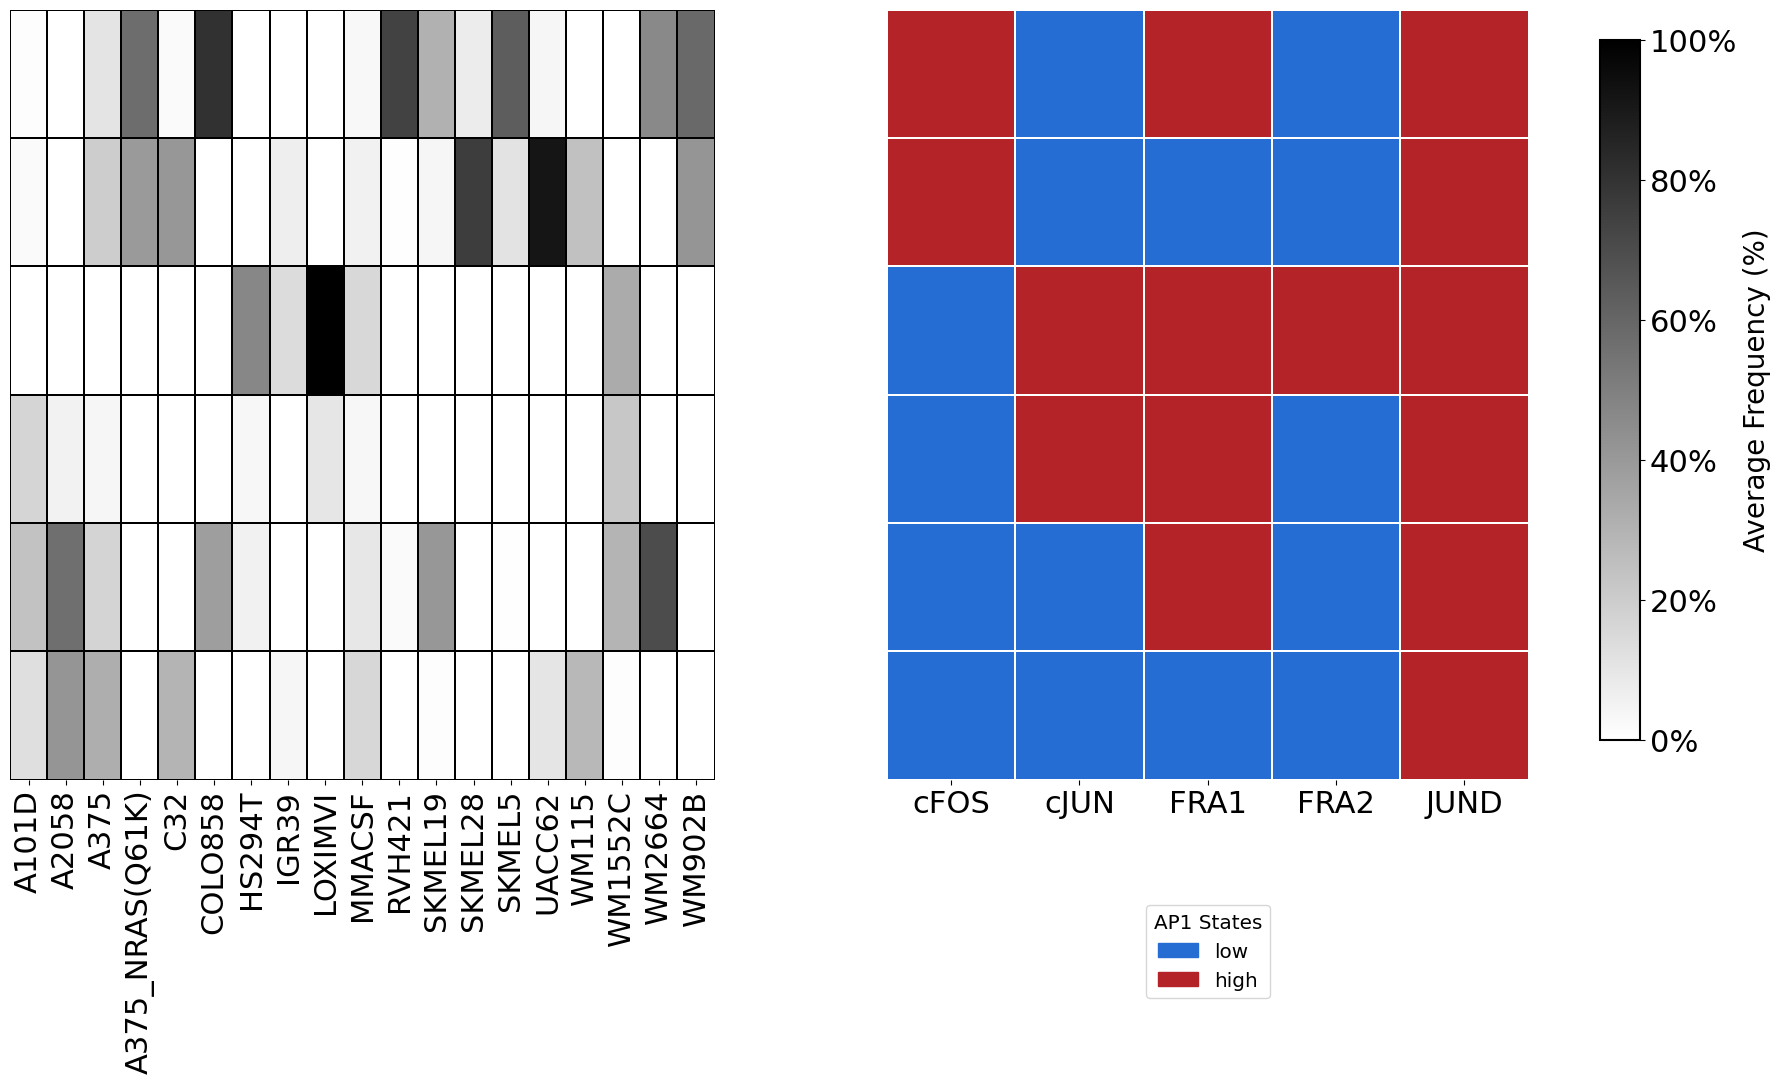

In [29]:
# We get the same number of states if we are to select cell lines with an average frequency of >5%. But we do loose low frequency cell states
# this is the plot that you need that matches the state that are used to calibrate the simulation data
grouped_above_5 = grouped[grouped['average_frequency'] >= 5]
plot_heatmaps(average_freq_df=grouped_above_5)

In [46]:
# Export cell lines with significant states to a CSV file
# these represent the single cell data that will be used to calibtate the model
significant_states = grouped_above_5['state'].unique()

# Now, let's filter ap1_select_filtered to only include these states
significant_data = ap1_select_filtered[ap1_select_filtered['state'].isin(significant_states)]
#significant_data
significant_data.to_csv('ap1_singlecell_experimental_data_filtered_fromAvgFreq_states.csv', index=False)

In [ ]:
# this is filtering the filtered states and I dont know if its right to do
# Group the data by 'state' and apply the condition
#exist at an averaged frequency of > 10 % in at least half of the cell lines(i.e., > 3 cell lines).
# filtered_states = grouped.groupby('state').filter(lambda x: (x['average_frequency'] > 10).sum() >= 3)
# plot_heatmaps(filtered_states)


In [26]:
ap1_select_filtered

,cell_line,replicate_id,cFOS,cJUN,FRA1,FRA2,JUND,MITF,SOX10,cFOS_state,cJUN_state,FRA1_state,FRA2_state,JUND_state,state
0,COLO858,2,7.147183,5.722960,6.525802,6.172763,6.597472,7.187279,7.279735,high,low,high,low,high,"(high, low, high, low, high)"
1,COLO858,2,6.765179,4.621774,7.161924,6.006806,6.549695,7.149487,7.862628,high,low,high,low,high,"(high, low, high, low, high)"
2,COLO858,2,6.739002,5.116043,6.817099,5.813044,6.904365,7.763899,7.610003,high,low,high,low,high,"(high, low, high, low, high)"
3,COLO858,2,6.286608,4.834630,6.681305,7.205439,7.302219,6.664927,6.365971,low,low,high,high,high,"(low, low, high, high, high)"
4,COLO858,2,6.337903,6.113940,7.113154,6.405335,6.856567,7.334177,7.565798,low,low,high,low,high,"(low, low, high, low, high)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115128,WM115,2,5.879766,5.320457,5.078526,5.511158,6.110060,6.127083,6.660544,low,low,low,low,high,"(low, low, low, low, high)"
115129,WM115,2,6.492230,5.560446,5.016697,5.421357,5.601450,6.570729,6.466751,high,low,low,low,low,"(high, low, low, low, low)"
115130,WM115,2,5.750218,4.238472,5.397314,4.885684,5.913369,6.157936,7.082689,low,low,low,low,high,"(low, low, low, low, high)"
115131,WM115,2,6.715969,5.519622,4.393129,5.373734,5.525268,6.246150,6.017869,high,low,low,low,low,"(high, low, low, low, low)"


In [27]:
pivot_df

cell_line,A101D,A2058,A375,A375ΔNRAS,C32,COLO858,HS294T,IGR39,LOXIMVI,MMACSF,RVH421,SKMEL19,SKMEL28,SKMEL5,UACC62,WM115,WM1552C,WM2664,WM902B
state,,,,,,,,,,,,,,,,,,,
"(high, low, high, low, high)",6.476103,0.000000,13.294541,44.410390,7.387895,60.350123,0.000000,0.000000,0.000000,7.910807,55.759200,26.608255,11.191152,48.768625,8.562728,0.000000,0.000000,37.271318,45.686778
"(high, low, low, low, high)",7.494460,0.000000,19.260195,32.628089,33.406967,0.000000,0.000000,10.504075,0.000000,9.713755,6.234472,8.316258,57.053067,13.353649,67.685904,22.453687,0.000000,0.000000,33.863491
"(low, high, high, high, high)",6.122895,0.000000,0.000000,0.000000,0.000000,0.000000,37.562753,15.217905,73.353289,16.326848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.105219,0.000000,0.000000
"(low, high, high, low, high)",17.137132,9.519780,8.365014,0.000000,0.000000,0.000000,8.228402,0.000000,12.700697,8.254719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.733755,0.000000,0.000000
"(low, low, high, low, high)",22.115165,44.057677,17.338668,5.932011,0.000000,31.511057,9.798181,0.000000,0.000000,12.415089,7.500377,33.517789,0.000000,6.374743,0.000000,0.000000,25.884758,53.330206,0.000000
"(low, low, low, low, high)",14.607199,34.007828,27.273083,0.000000,25.731535,0.000000,0.000000,8.548832,0.000000,16.481105,0.000000,6.676093,6.158160,0.000000,13.040733,24.840630,6.547524,0.000000,0.000000


In [36]:
# This is all the data that contains the filtered states (Total of 6 AP-1 states)
#grouped_above_5.to_csv('ap1_singlecell_replicate_avg_frq_states_v2.csv')

In [28]:
#Print the first 5 rows of pivot_df
ap1_select_filtered

,cell_line,replicate_id,cFOS,cJUN,FRA1,FRA2,JUND,MITF,SOX10,cFOS_state,cJUN_state,FRA1_state,FRA2_state,JUND_state,state
0,COLO858,2,7.147183,5.722960,6.525802,6.172763,6.597472,7.187279,7.279735,high,low,high,low,high,"(high, low, high, low, high)"
1,COLO858,2,6.765179,4.621774,7.161924,6.006806,6.549695,7.149487,7.862628,high,low,high,low,high,"(high, low, high, low, high)"
2,COLO858,2,6.739002,5.116043,6.817099,5.813044,6.904365,7.763899,7.610003,high,low,high,low,high,"(high, low, high, low, high)"
3,COLO858,2,6.286608,4.834630,6.681305,7.205439,7.302219,6.664927,6.365971,low,low,high,high,high,"(low, low, high, high, high)"
4,COLO858,2,6.337903,6.113940,7.113154,6.405335,6.856567,7.334177,7.565798,low,low,high,low,high,"(low, low, high, low, high)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115128,WM115,2,5.879766,5.320457,5.078526,5.511158,6.110060,6.127083,6.660544,low,low,low,low,high,"(low, low, low, low, high)"
115129,WM115,2,6.492230,5.560446,5.016697,5.421357,5.601450,6.570729,6.466751,high,low,low,low,low,"(high, low, low, low, low)"
115130,WM115,2,5.750218,4.238472,5.397314,4.885684,5.913369,6.157936,7.082689,low,low,low,low,high,"(low, low, low, low, high)"
115131,WM115,2,6.715969,5.519622,4.393129,5.373734,5.525268,6.246150,6.017869,high,low,low,low,low,"(high, low, low, low, low)"


In [29]:
pivot_df = average_freq_df.pivot(index = 'state', columns='cell_line', values='average_frequency')
#pivot_df = pivot_df.dropna()
# Create a cluster map with hierarchical clustering
#sns.clustermap(pivot_df, cmap="Blues", annot=True, linewidths=.03, linecolor="black", fmt='.1f', annot_kws={"size": 8})

In [30]:
#replace all NaN with 0
pivot_df = pivot_df.fillna(0)
# change column name A375 _x001A_NRAS_Q61K to A375_NRAS_Q61K
# columns = pivot_df.columns.tolist()

# # Create a new list of column names with the desired name change
# new_columns = [col.replace('A375 _x001A_NRAS(Q61K)', 'A375_NRAS_Q61K') for col in columns]

# # Assign the new list of column names to the DataFrame
# pivot_df.columns = new_columns



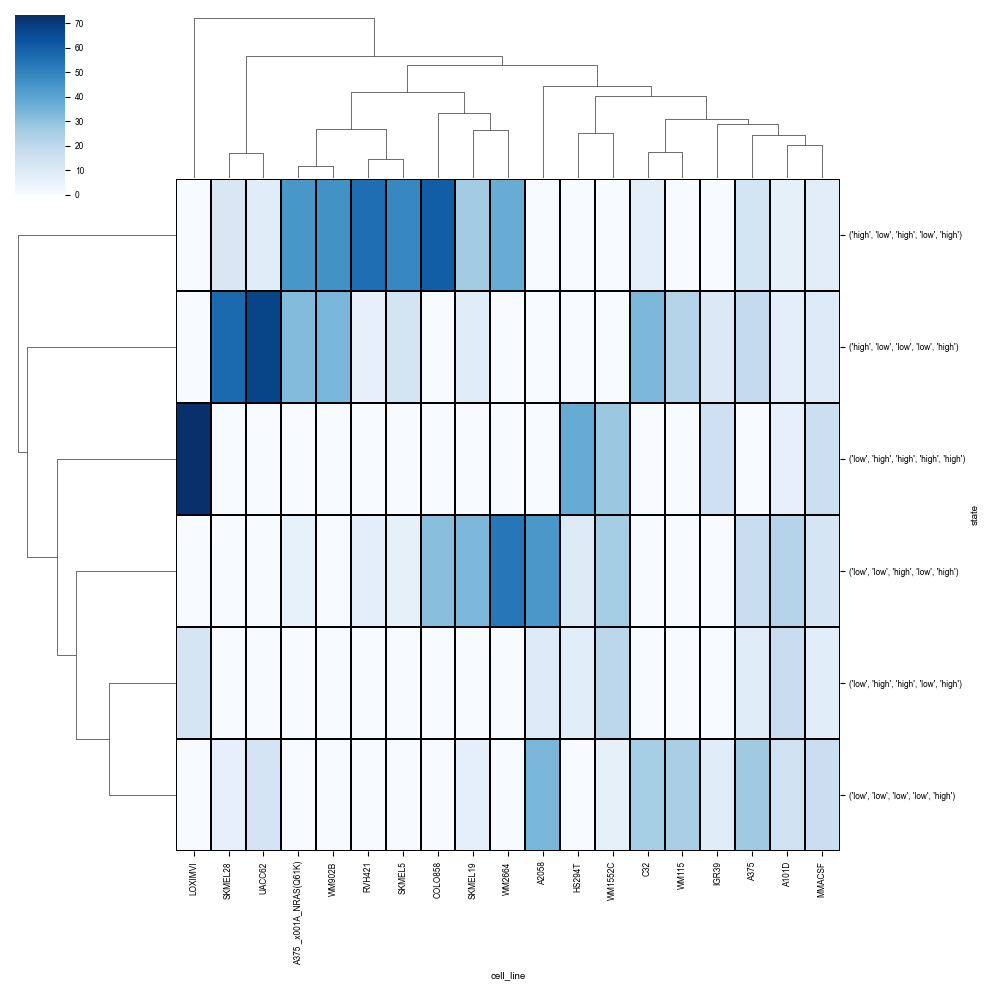

In [23]:
binary_df = pivot_df.notnull().astype('int')
sns.clustermap(pivot_df, cmap="Blues", linewidths=.03, linecolor="black")


#### Cluster 19 cell lines based on these six AP-1 states (PCA)

In [31]:
df = ap1_select_filtered.copy()
# selecte the columns cell_line, replicate_id, cFOS, cJUN, FRA1, FRA2, JUND
df = df[['cell_line', 'replicate_id', 'cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']]
# print the number of replicate_id for each cell line

df['cell_line'] = df['cell_line'].replace(
    {'A375 _x001A_NRAS(Q61K)': 'A375_NRAS(Q61K)'})
# Group by cell_line and calculate mean for each protein
pivoted_df = df.groupby('cell_line')[['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']].mean()



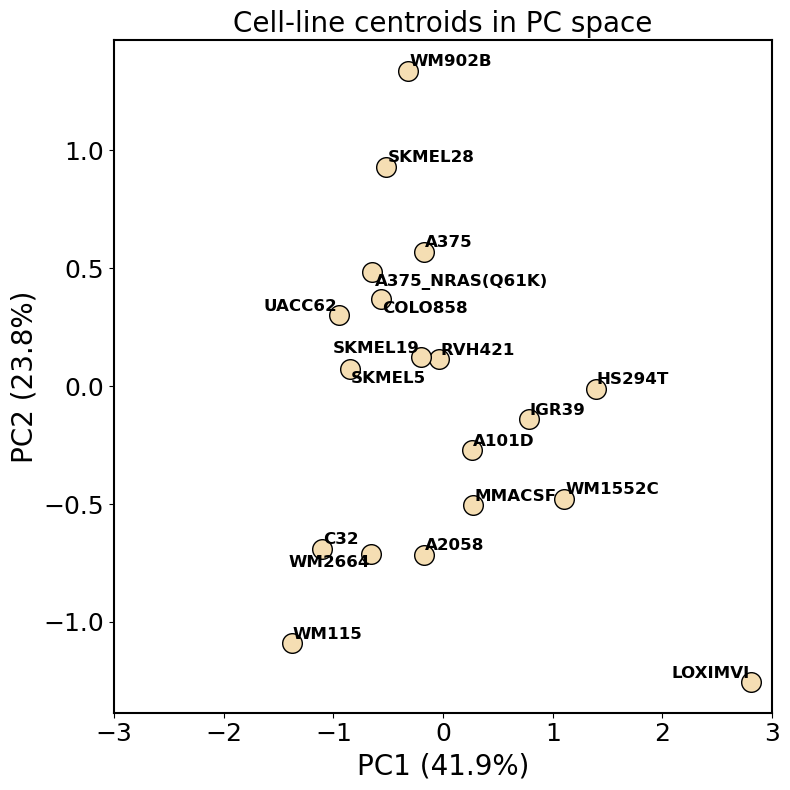

In [ ]:
# PCA on all cells used in the cluster map above and plotting the centroids
# 1) Run PCA on _all_ cells (or on a modest down-sample if you like)
proteins = ['cFOS','cJUN','FRA1','FRA2','JUND']
X = df[proteins].values
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# 2) Build a DataFrame with PCs + cell_line
pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
pc_df['cell_line'] = df['cell_line'].values

# 3) Compute centroids
centroids = pc_df.groupby('cell_line')[['PC1','PC2']].mean()

# 4) Scatter & annotate centroids only
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(centroids['PC1'], centroids['PC2'], s=200, c='wheat', edgecolor='k')
texts = [ax.text(x, y, line, fontsize=12, weight='bold')
         for line,(x,y) in centroids.iterrows()]
adjust_text(texts, ax=ax)
# set x lim from -4 to 4
ax.set_xlim(-3, 3)
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
ax.set_title("Cell‐line centroids in PC space")
plt.tight_layout()
plt.show()


Explained variance by principal component 1: 37.98%
Explained variance by principal component 2: 27.94%


/var/folders/__/h1scybwx6txcjzlhvr2q1wwm0000gn/T/ipykernel_32346/1423664873.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(principalDf['PC1'][i], principalDf['PC2'][i], principalDf.index[i],fontsize = 23) for i in range(len(principalDf))]


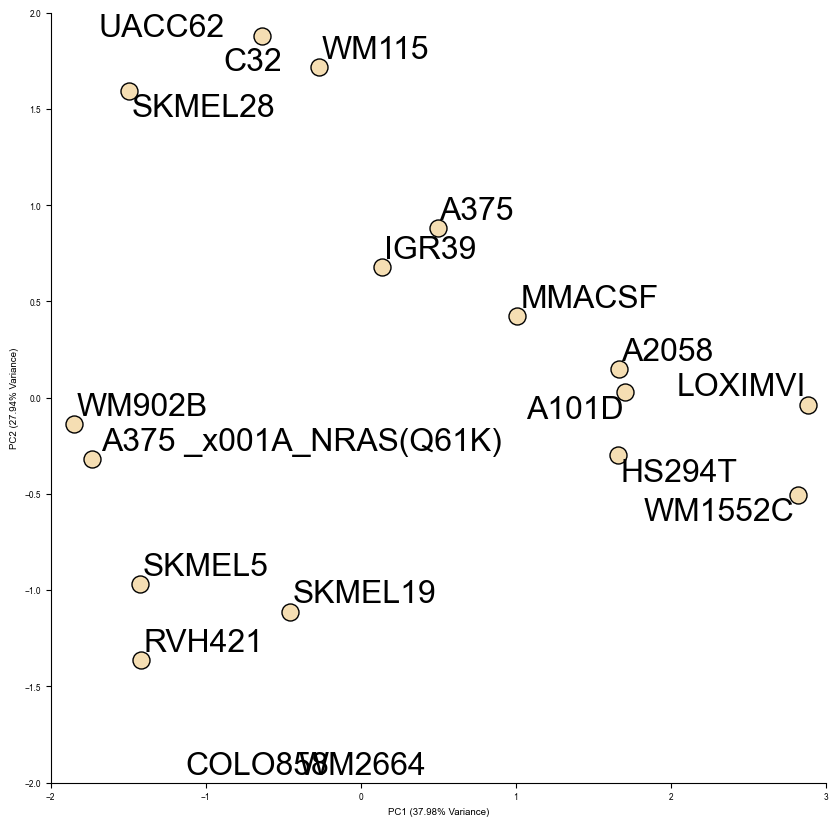

In [29]:
# Transpose dataframe so that cell lines are rows
#binary_df_transposed = pivoted_df
pivoted_df = pivot_df.copy()
pivoted_df = pivoted_df.T
binary_df_transposed = pivoted_df


# Standardize the data
scaler = StandardScaler()
binary_scaled = scaler.fit_transform(binary_df_transposed)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(binary_scaled)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'], index=binary_df_transposed.index)

# Print the explained variance ratio
print('Explained variance by principal component 1: {:.2%}'.format(pca.explained_variance_ratio_[0]))
print('Explained variance by principal component 2: {:.2%}'.format(pca.explained_variance_ratio_[1]))

# Plot PCA
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('PC1 ({:.2%} Variance)'.format(pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 ({:.2%} Variance)'.format(pca.explained_variance_ratio_[1]))
#ax.set_title('PCA of Binarized Cell lines', fontsize=20)

ax.scatter(principalDf['PC1'], principalDf['PC2'], s=150, c='wheat', alpha=1, edgecolors='k')
# set x lim from -4 to 4
ax.set_xlim(-2, 3)
# set y lim from -4 to 4
ax.set_ylim(-2, 2)

# Annotate cell lines
texts = [plt.text(principalDf['PC1'][i], principalDf['PC2'][i], principalDf.index[i],fontsize = 23) for i in range(len(principalDf))]
adjust_text(texts)

#ax.grid()
#fig.savefig('Fig2Supp_PCA_on_pop_avg_clustermap_PC1_PC2.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


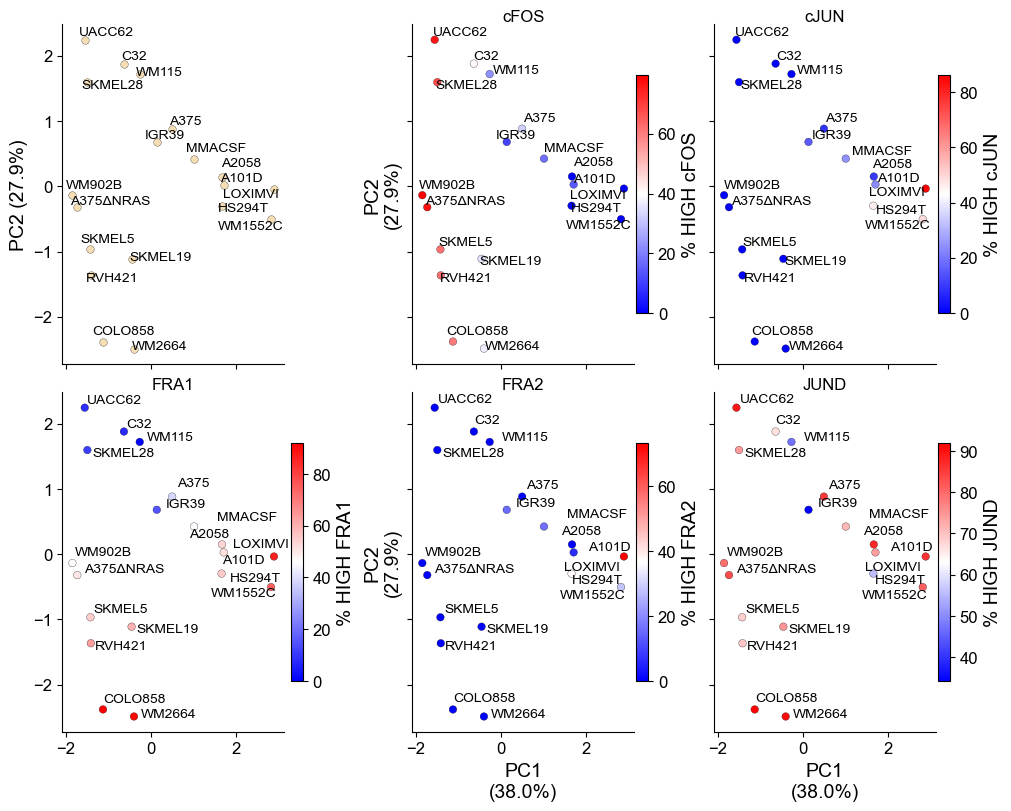

In [21]:
import ast
from matplotlib.colors import TwoSlopeNorm 
import matplotlib as mpl

pivoted_df = pivot_df.copy().T

# If your columns are still strings like "(high, low, …)", convert them to tuples:
if isinstance(pivoted_df.columns[0], str):
    pivoted_df.columns = [ast.literal_eval(c) for c in pivoted_df.columns]

# 1) run your PCA on pivoted_df as before
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(pivoted_df)
pca      = PCA(n_components=2)
PCs      = pca.fit_transform(X_scaled)

principalDf = __import__('pandas').DataFrame(
    PCs, columns=['PC1','PC2'], index=pivoted_df.index
)

def fraction_high(prot_name):
    proteins = ['cFOS','cJUN','FRA1','FRA2','JUND']
    idx      = proteins.index(prot_name)
    high_cols = [c for c in pivoted_df.columns if c[idx]=='high']
    return pivoted_df[high_cols].sum(axis=1)

proteins = ['cFOS','cJUN','FRA1','FRA2','JUND']

# 2) build 2×3 grid, figsize=(10,8)
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(10, 8),
    sharex=True, sharey=True,
    constrained_layout=True
)
axes = axes.flatten()

# 3) subplot[0]: plain PCA, all points wheat
ax = axes[0]
ax.set_title("")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")

sc = ax.scatter(
    principalDf['PC1'], principalDf['PC2'],
    c='wheat', edgecolors='k',
    s=30, linewidths=0.2
)
texts = [
    ax.text(x, y, cell, clip_on=False)
    for cell, (x,y) in principalDf[['PC1','PC2']].iterrows()
]
adjust_text(texts, ax=ax)

# 4) subplots[1]–[5]: colored by each protein
for i, prot in enumerate(proteins, start=1):
    ax = axes[i]
    frac = fraction_high(prot)
    
    # KEY CHANGE: Use dynamic vmax based on actual data
    actual_max = frac.max()
    actual_min = frac.min()
    
    # Set vcenter to halfway between min and max
    vcenter = (actual_min + actual_max) / 2
    
    # Use dynamic normalization
    norm = TwoSlopeNorm(vmin=actual_min, vcenter=vcenter, vmax=actual_max)

    sc = ax.scatter(
        principalDf['PC1'], principalDf['PC2'],
        c=frac, cmap='bwr', norm=norm,
        s=30, edgecolors='k', linewidths=0.2
    )
    cb = fig.colorbar(sc, ax=ax, shrink=0.7, pad=0.01)
    cb.set_label(f"% HIGH {prot}")
    cb.ax.tick_params()

    ax.set_title(prot, pad=2, fontsize=12)
    if i >= 4:  # Bottom row
        ax.set_xlabel(f"PC1\n({pca.explained_variance_ratio_[0]:.1%})")
    if i in [1, 4]:  # Left column
        ax.set_ylabel(f"PC2\n({pca.explained_variance_ratio_[1]:.1%})")

    texts = [
        ax.text(x, y, cell, clip_on=False)
        for cell, (x,y) in principalDf[['PC1','PC2']].iterrows()
    ]
    adjust_text(
        texts, ax=ax,
        expand_text=(1.0,1.0),
        expand_points=(1.0,1.0),
    )

# No unused panels to turn off in 2x3 grid with 6 plots

plt.show()

Number of high-frequency states: 6
Original data shape: (115133, 15)
Filtered data shape: (91315, 15)
Protein means shape: (19, 7)

Protein z-score summary:
               cFOS          cJUN          FRA1          FRA2          JUND  \
count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
mean   1.168656e-16  5.872495e-16  6.792812e-16 -1.092693e-15  4.481795e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.639163e+00 -1.348213e+00 -1.557047e+00 -1.404137e+00 -1.798636e+00   
25%   -5.160198e-01 -6.048193e-01 -7.783631e-01 -5.691417e-01 -8.083629e-01   
50%   -6.378030e-02 -2.549941e-01 -1.848254e-02 -3.767579e-01  2.106061e-01   
75%    7.449067e-01  4.052019e-01  6.167423e-01  3.271040e-01  5.324921e-01   
max    1.875188e+00  3.171657e+00  1.631649e+00  2.371380e+00  2.028492e+00   

               MITF         SOX10  
count  1.900000e+01  1.900000e+01  
mean  -8.706486e-16  1.197872e-15  
std    1.000000e+00  1.

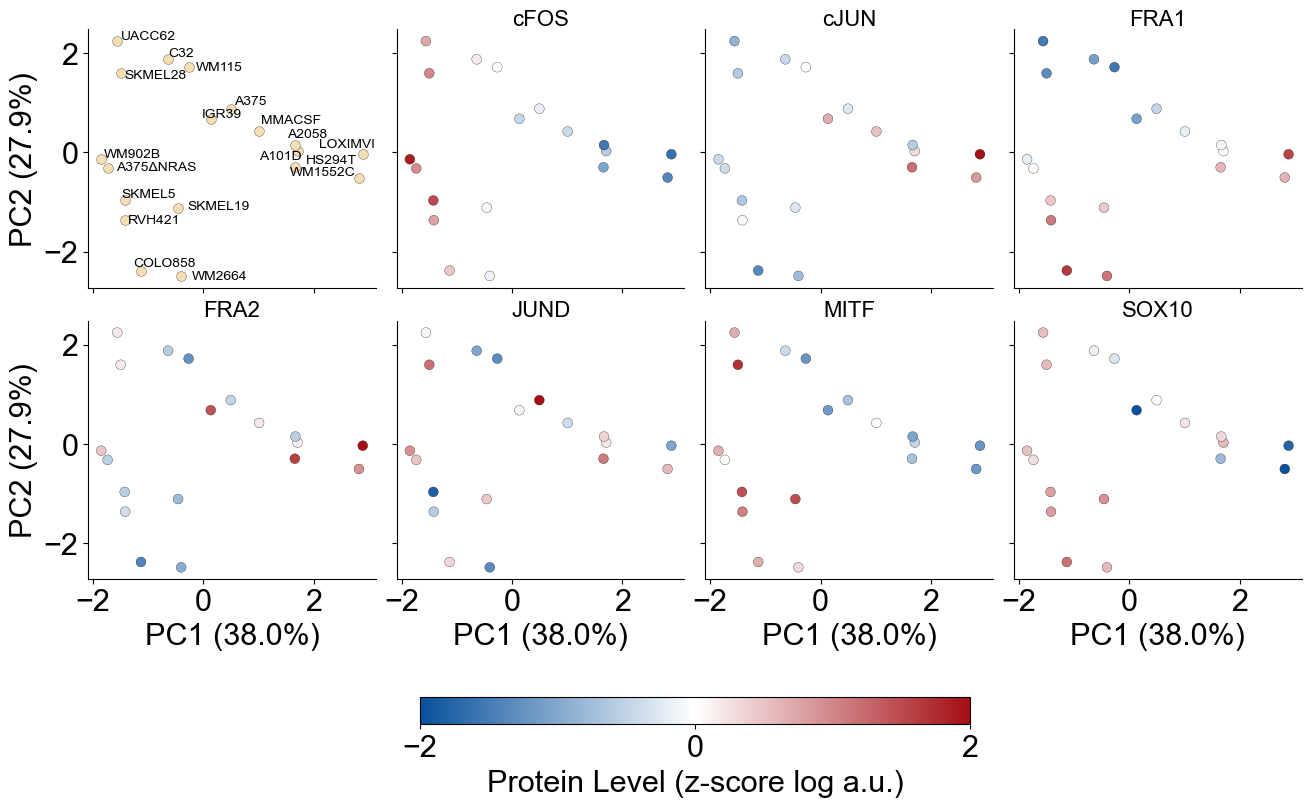


PCA plot saved as ../figures/Fig2C_pca_plot_protein_zscores.pdf
🎨 Points are now colored by z-scored protein levels from high-frequency states!


In [37]:
# ——————————————————————————————————————————————————————————————
# STEP 1: Filter and aggregate protein data for high-frequency states
# ——————————————————————————————————————————————————————————————

# Get the high-frequency states from pivot_df
high_freq_states = pivot_df.index.tolist()
print(f"Number of high-frequency states: {len(high_freq_states)}")

# Filter ap1_select_filtered to only include these states
state_filtered_data = ap1_select_filtered[ap1_select_filtered['state'].isin(high_freq_states)].copy()
print(f"Original data shape: {ap1_select_filtered.shape}")
print(f"Filtered data shape: {state_filtered_data.shape}")

# Apply cell line name replacement for consistency with PCA data
state_filtered_data['cell_line'] = state_filtered_data['cell_line'].str.replace('A375 *x001A*NRAS(Q61K)', 'A375ΔNRAS')

# Define all 7 protein columns
protein_columns = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND', 'MITF', 'SOX10']

# Group by cell line and calculate mean protein values
protein_means = state_filtered_data.groupby('cell_line')[protein_columns].mean()
print(f"Protein means shape: {protein_means.shape}")

# Z-score the protein values across cell lines
protein_zscored = protein_means.copy()
for col in protein_columns:
    protein_zscored[col] = (protein_means[col] - protein_means[col].mean()) / protein_means[col].std()

print("\nProtein z-score summary:")
print(protein_zscored.describe())

# ——————————————————————————————————————————————————————————————
# STEP 2: Run PCA first (needed for verification)
# ——————————————————————————————————————————————————————————————

import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from adjustText import adjust_text

# Prepare your pivoted dataframe (same as before)
pivoted_df = pivot_df.copy().T
if isinstance(pivoted_df.columns[0], str):
    pivoted_df.columns = [ast.literal_eval(c) for c in pivoted_df.columns]

# Run PCA (same as before)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivoted_df)
pca = PCA(n_components=2)
PCs = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(PCs,
                           columns=['PC1','PC2'],
                           index=pivoted_df.index)

# ——————————————————————————————————————————————————————————————
# STEP 3: Verify cell line consistency
# ——————————————————————————————————————————————————————————————

# Get cell lines from both datasets
pca_cell_lines = set(principalDf.index)
protein_cell_lines = set(protein_zscored.index)

print(f"\nCell lines in PCA: {len(pca_cell_lines)}")
print(f"Cell lines in protein data: {len(protein_cell_lines)}")

missing_from_protein = pca_cell_lines - protein_cell_lines
missing_from_pca = protein_cell_lines - pca_cell_lines

if missing_from_protein:
    print(f"Missing from protein data: {missing_from_protein}")
if missing_from_pca:
    print(f"Missing from PCA data: {missing_from_pca}")
if not missing_from_protein and not missing_from_pca:
    print("All cell lines match between PCA and protein data!")

# ——————————————————————————————————————————————————————————————
# STEP 4: Modified PCA plotting with z-scored protein coloring
# ——————————————————————————————————————————————————————————————

# Function to get z-scored protein values for each cell line
def get_protein_zscore(prot_name):
    """Get z-scored protein values for coloring PCA points"""
    if prot_name in protein_zscored.columns:
        return protein_zscored[prot_name].reindex(principalDf.index)
    else:
        raise ValueError(f"Protein {prot_name} not found in z-scored data")

# Set up 2×4 grid for 1 labeled PCA + 7 protein-colored PCAs = 8 total subplots
fig, axes = plt.subplots(nrows=2, ncols=4,
                         figsize=(13, 8),
                         sharex=True, sharey=True,
                         constrained_layout=True)
axes = axes.flatten()

# First panel: plain PCA + labels (same as your original)
ax0 = axes[0]
ax0.scatter(principalDf['PC1'], principalDf['PC2'],
            c='wheat', edgecolors='k',
            s=50, linewidths=0.2)
ax0.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")

texts = [
    ax0.text(x, y, cell, clip_on=False)
    for cell, (x, y) in principalDf[['PC1','PC2']].iterrows()
]
adjust_text(texts, ax=ax0)

# Colored panels: use z-score scale (-2 to +2)
z_min, z_max = -2, 2
norm = Normalize(vmin=z_min, vmax=z_max)
#cmap = plt.cm.RdBu_r  # Red-Blue colormap (red for high, blue for low)

colors = ['#08519C', '#FFFFFF', '#A50F15']  # Dark blue, white, dark red
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom_blue_white_red', colors, N=n_bins)


for i, prot in enumerate(protein_columns, start=1):
    ax = axes[i]
    zscore_values = get_protein_zscore(prot)
    
    sc = ax.scatter(principalDf['PC1'], principalDf['PC2'],
                    c=zscore_values, cmap=cmap, norm=norm,
                    s=50, edgecolors='k', linewidths=0.2)
    
    ax.set_title(prot, pad=2, fontsize=16)
    if i >= 4:  # Bottom row (positions 4, 5, 6, 7 in 2×4 grid)
        ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
    if i == 4:  # Left side of bottom row
        ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")

# Single horizontal colorbar at bottom
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(
    sm,
    ax=axes[1:],  # apply to all colored panels
    orientation='horizontal',
    fraction=0.05, pad=0.08
)
cbar.set_label('Protein Level (z-score log a.u.)', labelpad=5)
cbar.set_ticks([-2, 0, 2])

# Save and show
plot_name = 'Fig2C_pca_plot_protein_zscores'
pdf_path = f'../figures/{plot_name}.pdf'
fig.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPCA plot saved as {pdf_path}")
print("🎨 Points are now colored by z-scored protein levels from high-frequency states!")